# Capstone Project Spotlight: Distinguishing AI-Generated fake News from Human Written Articles

### Team Name: AIK9s
### Team Members: Bill Park, Daphne He, Kacey Choi
- Github Repo: https://github.com/daphnehe/Capstone/tree/main
- Wix-website: https://b2park17.wixsite.com/aicheckmate

### Research Question:How effective are various machine learning models at differentiating between human-generated and AI-generated fake news, and which model provides the highest accuracy using our specific dataset?
### Contributions:
- Bill: Research on data sources,Compiled and find data, created the Wix website
- Daphne: Data cleaning/preprocessing
  - ML model testing
- Kaecy:
  - Step descriptions and explanations in Markdown
  - QQQ format

## Introduction
##### In an era where artificial intelligence (AI) has become adept at producing text that closely mimics human writing, the ability to accurately differentiate between content created by humans and that generated by machines is more crucial than ever. Our project centers on developing and comparing various machine learning models to effectively make this distinction, which is a fundamental step in addressing the broader challenge of Ai generated fake news detection.


### The spread of online misinformation poses a serious threat to democracies in the 21st century. It erodes trust in public institutions and increases political polarization, weakening the foundation that democratic systems are built upon.

### Initial Setup

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daphnehe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/daphnehe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/daphnehe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import json
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## Data sources
The type of data we needed was hard to find. Although there are lots of work conducted in the field of Ai text detection, most studies would just classify AI generated aritcles and text to be fake and misinformation.

We will be mainly using Data from the paper “Adapting Fake News Detection to the era of Large Language Models”, as they provide data in the 4 specific categories we needed to test and continue our project. The data set is divided in to Machine generate fake news(MF), Machine paraphrase real news(MR), Human generated Fake News(HF), and human generated Real News(HR).

Articles in the data set are News articles that were crawled and collected from Originally Gossipcop.com(entertainment source fact checking company)(which is now acquired by Suggest.com).

## Loading Data

### Purpose
##### We need to load our data, stored in JSON format, into a structured DataFrame. This process is essential as it converts raw data into a workable format, allowing for more efficient manipulation and analysis.

## Loading Data

### Purpose
##### We need to load our data, stored in JSON format, into a structured DataFrame. This process is essential as it converts raw data into a workable format, allowing for more efficient manipulation and analysis.

In [4]:
# Function to load JSON data into a DataFrame
def load_json_to_df(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    return pd.DataFrame.from_dict(data, orient='index')

# List of JSON files
json_files = ['HR.json', 'HF.json', 'MR.json', 'MF.json']
dfs = []

# Load each JSON file into a DataFrame and store them in a list
for json_file in json_files:
    df = load_json_to_df('data/' + json_file)
    dfs.append(df)

# Naming the DataFrames
HR_df, HF_df, MR_df, MF_df = dfs

In [5]:
# Human Real News
HR_df

,id,text,title,description
0,gossipcop-951329,11 Summer Camp Movies That'll Make You Nostalg...,11 Summer Camp Movies That'll Make You Nostalg...,Nothing says summer like watching a movie all ...
1,gossipcop-861360,Info Category: Richest Business › Executives N...,Charrisse Jackson Jordan Net Worth,What is Charrisse Jackson Jordan's net worth?
2,gossipcop-911046,Warning: This story contains major spoilers fr...,Raúl Esparza exits Law & Order: SVU after six ...,The actor reveals why he decided to leave the ...
3,gossipcop-899120,Lil Peep died of an overdose of fentanyl and g...,Lil Peep Cause of Death Revealed,Pima County Office of the Medical Examiner con...
4,gossipcop-919455,Goop is kicking off its weekly podcast in a bi...,"Gwyneth Paltrow, Oprah talk Weinstein, #MeToo’...",Goop is kicking off its weekly podcast in a bi...
...,...,...,...,...
4148,gossipcop-926663,Blac Chyna must be a “Fifty Shades of Grey” fa...,Blac Chyna’s dream house includes a sex room,It would be a secret room only accessible from...
4149,gossipcop-897832,Following the Golden Globe nominations last we...,"LAFCA 2018 Winners: ‘Roma’ Takes Best Picture,...",Previous LAFCA winners for Best Film include “...
4150,gossipcop-853896,Bobby Moynihan came to TCA to talk about his n...,Bobby Moynihan: Leaving ‘Saturday Night Live’ ...,Bobby Moynihan came to TCA to talk about his n...
4151,gossipcop-944201,A patient seeking the help of reality TV surge...,Woman claims botched implant surgery left her ...,A patient seeking the help of reality-TV surge...


In [6]:
# Human Fake News
HF_df

,id,text,title,description
0,gossipcop-1991455469,✕ Close Meghan Markle and Prince Harry have an...,As it happened: Prince Harry and Meghan Markle...,The wedding will take place in spring 2018
1,gossipcop-7798039260,Kim Kardashian and Kanye West are pulling out ...,Kim & Kanye Install At-Home Panic Room After P...,'Keeping the kids safe is the couples number o...
2,gossipcop-7817725290,Prince Harry and Meghan currently live at Kens...,£1.4million spent renovating Prince Harry and ...,Prince Harry and Meghan might not be living in...
3,gossipcop-5111151830,They can't get enough of the Biebs on this sho...,Photos from Dancing With the Stars: Special Gu...,Photos from Dancing With the Stars: Special Gu...
4,gossipcop-9658632569,Ben Affleck is keeping life with his three kid...,Jennifer Garner ‘Doesn’t Want’ Her Kids Around...,Jennifer Garner ‘doesn’t want’ her three kids ...
...,...,...,...,...
4079,gossipcop-7065786957,There was no shortage of celebrity beefs in 20...,The Biggest Celebrity Feuds of 2017,There was no shortage of celebrity beefs in 2017.
4080,gossipcop-1188213997,Kim Kardashian and her sisters seem pretty uni...,Kim Kardashian Criticizes Scott Disick for Dat...,See what Kim said on 'KUWTK' inside!
4081,gossipcop-9024002184,"When John and I got together, I found my love ...",Chrissy Teigen Opens Up for the First Time Abo...,"""The mental pain of knowing I let so many peop..."
4082,gossipcop-3520745692,Yikes! Less than 3 months after giving birth t...,Kylie Jenner Suffers Pregnancy Scare 3 Months ...,Yikes! Less than 3 months after giving birth t...


In [7]:
# AI Real News
MR_df

,id,description,text,title
0,gossipcop-951329,Nothing says summer like watching a movie all ...,"With summer just around the corner, it's the p...",11 Summer Camp Movies That'll Make You Nostalg...
1,gossipcop-861360,What is Charrisse Jackson Jordan's net worth?,"Charrisse Jackson Jordan, an American reality ...",Charrisse Jackson Jordan Net Worth
2,gossipcop-911046,The actor reveals why he decided to leave the ...,Warning: This story contains major spoilers fr...,Raúl Esparza Exits Law & Order: SVU After Six ...
3,gossipcop-899120,Pima County Office of the Medical Examiner con...,The Pima County Office of the Medical Examiner...,Lil Peep's Cause of Death Revealed
4,gossipcop-919455,Goop is kicking off its weekly podcast in a bi...,Goop is kicking off its weekly podcast in a bi...,"Gwyneth Paltrow, Oprah Discuss Weinstein and #..."
...,...,...,...,...
4164,gossipcop-849360,Kailyn Lowry revealed she was recently 'hookin...,"Kailyn Lowry, star of Teen Mom 2, recently ope...",Kailyn Lowry Reveals Regrets About Relationshi...
4165,gossipcop-923609,"Farrah Abraham, one of the stars of the MTV sh...","Farrah Abraham, star of MTV's Teen Mom OG, has...",Farrah Abraham Drops $5 Million 'Sex Shaming' ...
4166,gossipcop-933361,Kim DePaola can't say enough good things about...,"The Real Housewives of New Jersey star, Kim De...","Real Housewives' Kim DePaola on Botched, Terry..."
4167,gossipcop-902565,See the red carpet looks (and Time's Up black ...,The 2018 Golden Globes red carpet is one unlik...,Black but not boring! See the red carpet looks...


In [8]:
# AI Fake News
MF_df

,id,text,title,description
0,gossipcop-1991455469,Excitement and anticipation are in the air as ...,Royal Family prepares to welcome modern bride ...,The wedding will take place in spring 2018
1,gossipcop-7798039260,In the wake of Kim Kardashian's traumatic Pari...,Kim and Kanye's At-Home Panic Room Sparks Outr...,'Keeping the kids safe is the couples number o...
2,gossipcop-7817725290,"uke and Duchess of Sussex, Prince Harry and Me...",£1.4 Million Renovation for Prince Harry and M...,Prince Harry and Meghan might not be living in...
3,gossipcop-5111151830,"In a surprise turn of events, former President...",Former President Obama and Beyoncé grace the D...,Photos from Dancing With the Stars: Special Gu...
4,gossipcop-9658632569,"In an unexpected turn of events, Hollywood act...",Jennifer Garner Caught Banning Lindsay Shookus...,Jennifer Garner ‘doesn’t want’ her three kids ...
...,...,...,...,...
4079,gossipcop-7065786957,As we bid farewell to the drama-filled year th...,The Most Anticipated Celebrity Feuds of 2018,There was no shortage of celebrity beefs in 2017.
4080,gossipcop-1188213997,Reality television star Kim Kardashian is faci...,Kim Kardashian Accused of Hypocrisy After Crit...,See what Kim said on 'KUWTK' inside!
4081,gossipcop-9024002184,"Chrissy Teigen, the popular model and social m...",Chrissy Teigen Reveals Secret Struggle with Po...,"""The mental pain of knowing I let so many peop..."
4082,gossipcop-3520745692,Kylie Jenner and Travis Scott's relationship m...,Kylie Jenner and Travis Scott's Relationship o...,Yikes! Less than 3 months after giving birth t...


## Data Cleaning

### Purpose
##### The raw text data often contains noise and irrelevant information. Cleaning the text by removing special characters and transforming all text to lowercase standardizes the input for further processing, ensuring consistency across data samples.


In [9]:
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

HR_df['cleaned_text'] = HR_df['text'].apply(clean_text)
HF_df['cleaned_text'] = HF_df['text'].apply(clean_text)
MR_df['cleaned_text'] = MR_df['text'].apply(clean_text)
MF_df['cleaned_text'] = MF_df['text'].apply(clean_text)

## Text Preprocessing

### Purpose
##### Beyond basic cleaning, text data requires deeper preprocessing to be suitable for machine learning. This includes tokenization, stop word removal, and lemmatization, which simplify the text and reduce it to its meaningful essence. This step is critical for highlighting the textual features that are most informative for our classification task.


In [10]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the tokens back into a single string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

HR_df['preprocessed_text'] = HR_df['cleaned_text'].apply(preprocess_text)
HF_df['preprocessed_text'] = HF_df['cleaned_text'].apply(preprocess_text)
MR_df['preprocessed_text'] = MR_df['cleaned_text'].apply(preprocess_text)
MF_df['preprocessed_text'] = MF_df['cleaned_text'].apply(preprocess_text)

print("Human Real News:")
print(HR_df['preprocessed_text'])
print("\nHuman Fake News:")
print(HF_df['preprocessed_text'])
print("\nAI Real News:")
print(MR_df['preprocessed_text'])
print("\nAI Fake News:")
print(MF_df['preprocessed_text'])

Human Real News:
0       summer camp movie thatll make nostalgic childh...
1       info category richest business executive net w...
2       warning story contains major spoiler recent ep...
3       lil peep died overdose fentanyl generic xanax ...
4       goop kicking weekly podcast big way oprah big ...
                              ...                        
4148    blac chyna must fifty shade grey fan video arc...
4149    following golden globe nomination last week aw...
4150    bobby moynihan came tca talk new cbs comedy un...
4151    patient seeking help reality tv surgeon paul n...
4152    everything mean much said serious health incid...
Name: preprocessed_text, Length: 4153, dtype: object

Human Fake News:
0       close meghan markle prince harry announced eng...
1       kim kardashian kanye west pulling stop keep fa...
2       prince harry meghan currently live kensington ...
3       cant get enough biebs show back first week sea...
4       ben affleck keeping life three kid

In [71]:
# Save the preprocessed data to a new JSON file 
# Do this only once!
# HR_df.to_json('HR_prep.json', orient='index')
# HF_df.to_json('HF_prep.json', orient='index')
# MF_df.to_json('MF_prep.json', orient='index')
# MR_df.to_json('MR_prep.json', orient='index')

In [72]:
# # Load the JSON data into a pandas DataFrame
# # Load Human real news
# with open('data/HR_prep.json', 'r') as file:
#     data = json.load(file)

# HR_prep_df = pd.DataFrame.from_dict(data, orient='index')
# HR_df = HR_prep_df['preprocessed_text']
# HR_df

### Removing Most Common and Least Common Words

To improve our model, we took out the most common and least common words, we tested out different ratios and settled with keeping words with over 30 and under 2000 frequency. We found that this consistently improved the accuracy of all our models. 

In [11]:
from collections import Counter

In [12]:
# Assuming you've already defined load_json_to_df

# Function to load and tokenize the text from a DataFrame
def load_and_tokenize_text(json_file):
    df = load_json_to_df(json_file)
    # Tokenize each item in the 'text' column
    df['tokens'] = df['preprocessed_text'].apply(word_tokenize)
    return df

# List of JSON files
json_files = ['HR_prep.json', 'HF_prep.json', 'MR_prep.json', 'MF_prep.json']
category_data = []

# Load and tokenize each JSON file into a DataFrame and store them in a list
for json_file in json_files:
    df = load_and_tokenize_text('data/' + json_file)
    category_data.append(df)

# Extract tokenized words for each category
tokens_hr = [token for sublist in category_data[0]['tokens'] for token in sublist]
tokens_hf = [token for sublist in category_data[1]['tokens'] for token in sublist]
tokens_mr = [token for sublist in category_data[2]['tokens'] for token in sublist]
tokens_mf = [token for sublist in category_data[3]['tokens'] for token in sublist]

def display_common_words(tokens, category_name):
    counter = Counter(tokens)
    most_common = counter.most_common()  # Get the top common words sorted by frequency

    # Exclude the words with frequency over 2000 and under 30
    filtered_common = [(word, freq) for word, freq in most_common if not (freq > 2000 or freq < 30)]
    
    # Create a DataFrame for the filtered common words
    df_filtered_common = pd.DataFrame(filtered_common, columns=['Word', 'Frequency'])
    
    # Count the number of words falling within the specified frequency range
    count_within_range = sum(1 for word, freq in most_common if 30 <= freq <= 2000)
    
#     print(f"Number of words within the frequency range (30 to 2000): {count_within_range}\n")

#     print(f"Common words in {category_name} (excluding words with frequency over 2000 and under 30):")
#     for word, freq in filtered_common:
#         print(f"{word}: {freq}")
#     print("\n")
    
    return df_filtered_common

# Create DataFrames for each category
df_hr_filtered_common = display_common_words(tokens_hr, "Human Real")
df_hf_filtered_common = display_common_words(tokens_hf, "Human Fake")
df_mr_filtered_common = display_common_words(tokens_mr, "Machine Real")
df_mf_filtered_common = display_common_words(tokens_mf, "Machine Fake")

In [13]:
df_hr_filtered_common

,Word,Frequency
0,together,1999
1,instagram,1959
2,got,1905
3,much,1867
4,thats,1866
...,...,...
5216,bundchen,30
5217,splashnewscom,30
5218,reeva,30
5219,phelps,30


In [14]:
df_hf_filtered_common

,Word,Frequency
0,last,1994
1,kardashian,1983
2,baby,1963
3,he,1963
4,woman,1949
...,...,...
4348,tiger,30
4349,ordeal,30
4350,tba,30
4351,socialmedia,30


In [15]:
df_mr_filtered_common

,Word,Frequency
0,relationship,1958
1,couple,1953
2,shared,1911
3,made,1856
4,day,1831
...,...,...
4663,hfpa,30
4664,encouragement,30
4665,sheen,30
4666,paige,30


In [16]:
df_mf_filtered_common

,Word,Frequency
0,year,1975
1,medium,1937
2,news,1911
3,many,1875
4,new,1784
...,...,...
2423,underwood,30
2424,pattinsons,30
2425,motion,30
2426,twig,30


In [17]:
hr_filtered_words = set(df_hr_filtered_common['Word'])
hf_filtered_words = set(df_hf_filtered_common['Word'])
mr_filtered_words = set(df_mr_filtered_common['Word'])
mf_filtered_words = set(df_mf_filtered_common['Word'])

# Function to filter text
def filter_text(text, filtered_words):
    # Split text into words
    words = text.split()
    # Filter words that are present in filtered_words
    filtered_text = [word for word in words if word in filtered_words]
    # Join the filtered words back into text
    return ' '.join(filtered_text)

# Apply the filter_text function to the 'text' column of HR_df
HR_df['filtered'] = HR_df['text'].apply(lambda x: filter_text(x, hr_filtered_words))
HF_df['filtered'] = HF_df['text'].apply(lambda x: filter_text(x, hf_filtered_words))
MR_df['filtered'] = MR_df['text'].apply(lambda x: filter_text(x, mr_filtered_words))
MF_df['filtered'] = MF_df['text'].apply(lambda x: filter_text(x, mf_filtered_words))

In [18]:
HR_df['filtered']

0                                                        
1       net reality television personality who net wor...
2       contains major recent episode actor joined as ...
3       died overdose according death ruled as medical...
4       kicking weekly podcast big guest hosted founde...
                              ...                        
4148    must teamed design imagine dream included infi...
4149    continues today big announcement as group set ...
4150    came talk comedy took lot stayed there forever...
4151    patient seeking help reality botched breast su...
4152    much he serious health director actor sufferin...
Name: filtered, Length: 4153, dtype: object

In [19]:
HF_df['filtered']

0       announced engagement free email across world f...
1       pulling keep safe reality shocking duo getting...
2       currently live look residence likely received ...
3                                   enough week season as
4       keeping three girlfriend anything around many ...
                              ...                        
4079    celebrity close shade kept take look intense c...
4080    seem pretty night sister criticized heading as...
4081    got found took dollar card take started home s...
4082    giving birth baby suffered pregnancy reacted t...
4083    welcomed according unknown singer gave though ...
Name: filtered, Length: 4084, dtype: object

In [20]:
MR_df['filtered']

0       summer around perfect take trip down memory la...
1       reality television personality amassed net wor...
2       story contains major recent episode officially...
3       confirmed rapper died overdose medical death a...
4       weekly podcast big guest hosted founder conver...
                              ...                        
4164    recently opened regarding relationship series ...
4165    decided drop million lawsuit reaching settleme...
4166    recently underwent plastic surgery popular rea...
4167    red carpet unlike initiative represented dress...
4168    renowned rapper made return nearly taking hiat...
Name: filtered, Length: 4169, dtype: object

In [21]:
MF_df['filtered']

0       anticipation air ready welcome newest finally ...
1       wake reality star husband decided take extra r...
2       may living much circulating set new latest sug...
3       surprise turn former music icon appeared episo...
4       unexpected turn actress caught life situation ...
                              ...                        
4079    year anticipation come top celebrity upcoming ...
4080    television star facing criticism online accuse...
4081    popular model social opened first battle inter...
4082    may recent pregnancy feeling decided take preg...
4083    exclusive report named newborn famous name dau...
Name: filtered, Length: 4084, dtype: object

In [22]:
HR_df

,id,text,title,description,cleaned_text,preprocessed_text,filtered
0,gossipcop-951329,11 Summer Camp Movies That'll Make You Nostalg...,11 Summer Camp Movies That'll Make You Nostalg...,Nothing says summer like watching a movie all ...,summer camp movies thatll make you nostalgic ...,summer camp movie thatll make nostalgic childh...,
1,gossipcop-861360,Info Category: Richest Business › Executives N...,Charrisse Jackson Jordan Net Worth,What is Charrisse Jackson Jordan's net worth?,info category richest business executives net...,info category richest business executive net w...,net reality television personality who net wor...
2,gossipcop-911046,Warning: This story contains major spoilers fr...,Raúl Esparza exits Law & Order: SVU after six ...,The actor reveals why he decided to leave the ...,warning this story contains major spoilers fro...,warning story contains major spoiler recent ep...,contains major recent episode actor joined as ...
3,gossipcop-899120,Lil Peep died of an overdose of fentanyl and g...,Lil Peep Cause of Death Revealed,Pima County Office of the Medical Examiner con...,lil peep died of an overdose of fentanyl and g...,lil peep died overdose fentanyl generic xanax ...,died overdose according death ruled as medical...
4,gossipcop-919455,Goop is kicking off its weekly podcast in a bi...,"Gwyneth Paltrow, Oprah talk Weinstein, #MeToo’...",Goop is kicking off its weekly podcast in a bi...,goop is kicking off its weekly podcast in a bi...,goop kicking weekly podcast big way oprah big ...,kicking weekly podcast big guest hosted founde...
...,...,...,...,...,...,...,...
4148,gossipcop-926663,Blac Chyna must be a “Fifty Shades of Grey” fa...,Blac Chyna’s dream house includes a sex room,It would be a secret room only accessible from...,blac chyna must be a fifty shades of grey fan\...,blac chyna must fifty shade grey fan video arc...,must teamed design imagine dream included infi...
4149,gossipcop-897832,Following the Golden Globe nominations last we...,"LAFCA 2018 Winners: ‘Roma’ Takes Best Picture,...",Previous LAFCA winners for Best Film include “...,following the golden globe nominations last we...,following golden globe nomination last week aw...,continues today big announcement as group set ...
4150,gossipcop-853896,Bobby Moynihan came to TCA to talk about his n...,Bobby Moynihan: Leaving ‘Saturday Night Live’ ...,Bobby Moynihan came to TCA to talk about his n...,bobby moynihan came to tca to talk about his n...,bobby moynihan came tca talk new cbs comedy un...,came talk comedy took lot stayed there forever...
4151,gossipcop-944201,A patient seeking the help of reality TV surge...,Woman claims botched implant surgery left her ...,A patient seeking the help of reality-TV surge...,a patient seeking the help of reality tv surge...,patient seeking help reality tv surgeon paul n...,patient seeking help reality botched breast su...


In [85]:
# Save the preprocessed data to a new JSON file 
# Do this only once!
# HR_df.to_json('HR_filtered.json', orient='index')
# HF_df.to_json('HF_filtered.json', orient='index')
# MF_df.to_json('MF_filtered.json', orient='index')
# MR_df.to_json('MR_filtered.json', orient='index')

## Preparing Processed Data

### Purpose
##### With text data now preprocessed, we reorganize it by loading the cleaned and structured text back into new DataFrames. This step ensures our data remains organized and accessible for model training and evaluation.


In [23]:
# Function to load JSON data into a DataFrame
def load_json_to_df(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    return pd.DataFrame.from_dict(data, orient='index')

# List of JSON files
json_files = ['HR_filtered.json', 'HF_filtered.json', 'MR_filtered.json', 'MF_filtered.json']
dfs = []

# Load each JSON file into a DataFrame and store them in a list
for json_file in json_files:
    df = load_json_to_df('data/' + json_file)
    dfs.append(df)

# Naming the DataFrames
HR_df, HF_df, MR_df, MF_df = dfs

In [24]:
HR = HR_df['filtered']
HR

0                                                        
1       net reality television personality who net wor...
2       contains major recent episode actor joined as ...
3       died overdose according death ruled as medical...
4       kicking weekly podcast big guest hosted founde...
                              ...                        
4148    must teamed design imagine dream included infi...
4149    continues today big announcement as group set ...
4150    came talk comedy took lot stayed there forever...
4151    patient seeking help reality botched breast su...
4152    much he serious health director actor sufferin...
Name: filtered, Length: 4153, dtype: object

In [25]:
HF = HF_df['filtered']
HF

0       announced engagement free email across world f...
1       pulling keep safe reality shocking duo getting...
2       currently live look residence likely received ...
3                                   enough week season as
4       keeping three girlfriend anything around many ...
                              ...                        
4079    celebrity close shade kept take look intense c...
4080    seem pretty night sister criticized heading as...
4081    got found took dollar card take started home s...
4082    giving birth baby suffered pregnancy reacted t...
4083    welcomed according unknown singer gave though ...
Name: filtered, Length: 4084, dtype: object

In [26]:
MR = MR_df['filtered']
MR

0       summer around perfect take trip down memory la...
1       reality television personality amassed net wor...
2       story contains major recent episode officially...
3       confirmed rapper died overdose medical death a...
4       weekly podcast big guest hosted founder conver...
                              ...                        
4164    recently opened regarding relationship series ...
4165    decided drop million lawsuit reaching settleme...
4166    recently underwent plastic surgery popular rea...
4167    red carpet unlike initiative represented dress...
4168    renowned rapper made return nearly taking hiat...
Name: filtered, Length: 4169, dtype: object

In [27]:
MF = MF_df['filtered']
MF

0       anticipation air ready welcome newest finally ...
1       wake reality star husband decided take extra r...
2       may living much circulating set new latest sug...
3       surprise turn former music icon appeared episo...
4       unexpected turn actress caught life situation ...
                              ...                        
4079    year anticipation come top celebrity upcoming ...
4080    television star facing criticism online accuse...
4081    popular model social opened first battle inter...
4082    may recent pregnancy feeling decided take preg...
4083    exclusive report named newborn famous name dau...
Name: filtered, Length: 4084, dtype: object

## Data Preparation for Modeling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

### Data Aggregation

#### Purpose
##### Before we can train our machine learning models, it is essential to compile all individual datasets into a single DataFrame. This consolidated data framework facilitates consistent processing and analysis across all text samples, ensuring that our models are trained on a unified dataset.


In [29]:
# Concatenate all data into one DataFrame
df = pd.concat([HR, HF, MR, MF], ignore_index=True)

In [30]:
HR

0                                                        
1       net reality television personality who net wor...
2       contains major recent episode actor joined as ...
3       died overdose according death ruled as medical...
4       kicking weekly podcast big guest hosted founde...
                              ...                        
4148    must teamed design imagine dream included infi...
4149    continues today big announcement as group set ...
4150    came talk comedy took lot stayed there forever...
4151    patient seeking help reality botched breast su...
4152    much he serious health director actor sufferin...
Name: filtered, Length: 4153, dtype: object

### Label Assignment

#### Purpose
##### Each text sample in our dataset needs a corresponding label to indicate whether it's human-written or AI-generated. This step is critical as it prepares our dataset for supervised learning, where each input (text) must have an associated output (label) for the model to learn from.


In [31]:
# Assigning labels: 0 for human news, 1 for AI news
labels = [0]*len(HR) + [0]*len(HF) + [1]*len(MR) + [1]*len(MF)

### Data Splitting

#### Purpose
##### To evaluate the effectiveness of our machine learning models, we must test them on unseen data. This is accomplished by splitting our dataset into two parts: training and testing sets. The training set is used to train the models, teaching them to recognize patterns between features (text) and labels (human or AI). The testing set, which the models have not seen during training, is used to assess how well the models generalize to new, unseen data. This split ensures that our performance metrics reflect the model's capability to perform in real-world scenarios, not just on the data it has learned.

#### Parameters:
- **test_size=0.2**: Allocates 20% of the dataset for testing, which is a standard split ratio in machine learning, providing a good balance between training data quantity and testing accuracy.
- **random_state=42**: Ensures reproducibility of the split. This setting acts as a seed for the random number generator used in splitting the dataset, allowing us and others to reproduce the exact split in the future.


In [32]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)

### Feature Extraction with TF-IDF

#### Purpose
##### After dividing the dataset, we utilize the Term Frequency-Inverse Document Frequency (TF-IDF) technique to transform text into numerical vectors. This method emphasizes words that are crucial for understanding content while diminishing the impact of frequently appearing but less informative words.

#### Why TF-IDF?
- **Relevance**: It enhances model accuracy by emphasizing words that provide the most informational value about the document.


#### Application in Our Project
TF-IDF is instrumental for our project as it transforms extensive text data into a structured format that's optimal for training our machine learning models, ensuring that features used in model training are the most representative of the text's content.


In [35]:
# Creating TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Training the Logistic Regression Model

#### Purpose
##### We now apply Logistic Regression, a widely used statistical method for binary classification tasks. This model is known for its simplicity and effectiveness in predicting categorical outcomes.

#### Model Training
- **Configuration**: We set `max_iter=1000` to ensure the model has sufficient iterations to converge on the optimal weights during training.
- **Training**: The model is trained on the TF-IDF vectors of the training data (`X_train_tfidf`), learning to associate the vectors with the corresponding labels (`y_train`).

#### Model Prediction
- **Testing**: After training, the Logistic Regression model is used to make predictions on the TF-IDF vectors of the test dataset (`X_test_tfidf`). These predictions allow us to evaluate the model's performance in terms of accuracy, helping us understand how well the model can generalize to new, unseen data.

#### Significance
Using Logistic Regression provides a baseline for the performance of text classification, allowing us to compare its results with more complex models if needed. This comparison can highlight the strengths and limitations of different approaches in the context of our text classification task.


In [36]:
# Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train_tfidf, y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_test_tfidf)

### Training the Naive Bayes Model

#### purpose
We continue our analysis by implementing the Naive Bayes classifier, renowned for its efficacy in text classification due to its simplicity and efficient handling of large datasets.

#### Model Training
- **Approach**: Naive Bayes calculates the probability of each text category based on the TF-IDF vector features, leveraging its assumption of feature independence.

#### Model Prediction
- **Testing**: After training, the model is tested on the unseen TF-IDF vectors from our test set. This step evaluates the model’s ability to generalize to new data once again.

#### Evaluation
- **Metrics**: We assess model performance using key metrics such as accuracy and F1-score, which help quantify its effectiveness in differentiating human-written from AI-generated texts.

### Significance
Deploying Naive Bayes allows for a comparison with Logistic Regression, helping identify the most suitable model for our needs based on empirical evidence.



In [37]:
# Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)
naive_bayes_predictions = naive_bayes_model.predict(X_test_tfidf)

### Evaluating the Logistic Regression Model
##### After training our Logistic Regression model, we evaluated its performance on the test dataset to determine how accurately it can identify human-written versus AI-generated texts.


In [38]:
# Evaluate Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_regression_predictions))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_regression_predictions))

Logistic Regression Accuracy: 0.9802910855063675
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1651
           1       0.99      0.97      0.98      1647

    accuracy                           0.98      3298
   macro avg       0.98      0.98      0.98      3298
weighted avg       0.98      0.98      0.98      3298



In [40]:
from sklearn.model_selection import cross_val_score

# Logistic Regression accuracy
logistic_scores = cross_val_score(logistic_regression_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')

# Logistic Regression loss
logistic_loss = -cross_val_score(logistic_regression_model, X_train_tfidf, y_train, cv=5, scoring='neg_log_loss')

# Naive Bayes accuracy
naive_bayes_scores = cross_val_score(naive_bayes_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')

# Naive Bayes loss
naive_bayes_loss = -cross_val_score(naive_bayes_model, X_train_tfidf, y_train, cv=5, scoring='neg_log_loss')

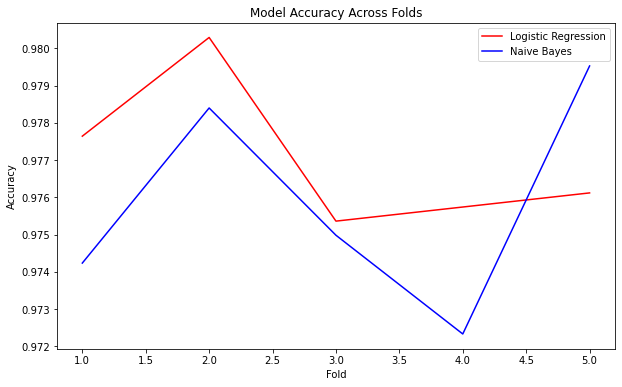

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), logistic_scores, 'r', label='Logistic Regression')
# plt.plot(range(1, 6), logistic_loss, 'b', label='Logistic Regression')
plt.plot(range(1, 6), naive_bayes_scores, 'b', label='Naive Bayes')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Across Folds')
plt.legend()
plt.show()

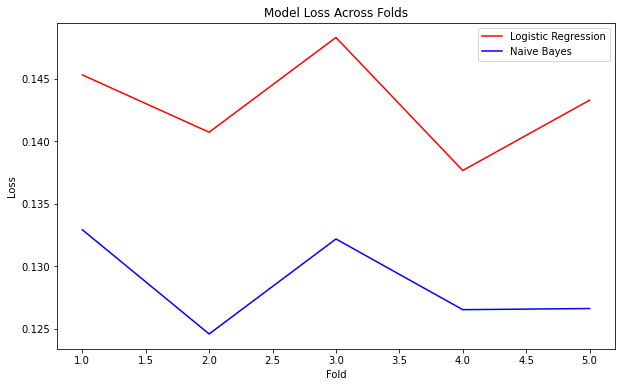

In [96]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Logistic Regression loss
logistic_loss = -cross_val_score(logistic_regression_model, X_train_tfidf, y_train, cv=5, scoring='neg_log_loss')

# Naive Bayes loss
naive_bayes_loss = -cross_val_score(naive_bayes_model, X_train_tfidf, y_train, cv=5, scoring='neg_log_loss')

# Plot loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), logistic_loss, 'r', label='Logistic Regression')
plt.plot(range(1, 6), naive_bayes_loss, 'b', label='Naive Bayes')
# plt.plot(range(1, 6), naive_bayes_scores, 'r', label='Naive Bayes')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.title('Model Loss Across Folds')
plt.legend()
plt.show()

#### Qualitative Analysis
##### The high accuracy and F1-scores indicate that Logistic Regression can be a great choice for our task. The model excels in distinguishing between the two types of texts, particularly notable in its ability to avoid false positives in AI-generated text identification.

### Implications
##### These results provide strong evidence that our feature engineering and model training approaches are effective. The high precision for AI-generated texts is particularly promising, as it suggests the model can be a reliable tool for filtering out AI-generated content in practical applications.

### Limitations and Considerations
##### While the results are promising, the slightly lower recall for AI-generated texts indicates room for improvement, possibly by further tuning the model or exploring alternative feature engineering techniques.

### Evaluating the Naive Bayes Model
##### The Naive Bayes model has been assessed to understand its effectiveness in classifying texts as either human-written or AI-generated.


In [42]:
# Evaluate Naive Bayes model
print("Naive Bayes Accuracy:", accuracy_score(y_test, naive_bayes_predictions))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, naive_bayes_predictions))

Naive Bayes Accuracy: 0.9736203759854457
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1651
           1       0.97      0.97      0.97      1647

    accuracy                           0.97      3298
   macro avg       0.97      0.97      0.97      3298
weighted avg       0.97      0.97      0.97      3298



# Naive Bayes Human vs AI Prediction

Accuracy for Machine vs. Human classification (Naive Bayes): 0.9748332322619769


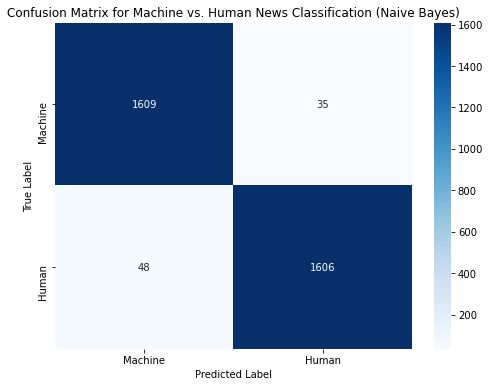

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Combine machine and human data
machine_data = pd.concat([MR, MF], ignore_index=True)
human_data = pd.concat([HR, HF], ignore_index=True)

# Assign labels
machine_labels = [1] * len(MR) + [1] * len(MF)
human_labels = [0] * len(HR) + [0] * len(HF)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(pd.concat([machine_data, human_data], ignore_index=True),
                                                    machine_labels + human_labels, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)
naive_bayes_predictions = naive_bayes_model.predict(X_test_tfidf)

# Evaluate model performance
accuracy = accuracy_score(y_test, naive_bayes_predictions)
print("Accuracy for Machine vs. Human classification (Naive Bayes):", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test, naive_bayes_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Machine', 'Human'], yticklabels=['Machine', 'Human'])
plt.title('Confusion Matrix for Machine vs. Human News Classification (Naive Bayes)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Naive Bayes Human Real vs Fake Prediction

Accuracy for Real vs. Fake Human classification (Naive Bayes): 0.9229368932038835


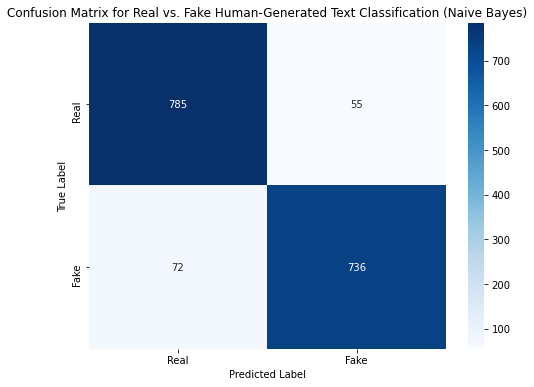

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Assign labels for real (0) and fake (1) human-generated text
real_fake_labels = [0] * len(HR) + [1] * len(HF)

# Split human data into train and test sets
X_train_real_fake, X_test_real_fake, y_train_real_fake, y_test_real_fake = train_test_split(human_data, real_fake_labels, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer_real_fake = TfidfVectorizer(max_features=5000)
X_train_real_fake_tfidf = tfidf_vectorizer_real_fake.fit_transform(X_train_real_fake)
X_test_real_fake_tfidf = tfidf_vectorizer_real_fake.transform(X_test_real_fake)

# Train Naive Bayes model
real_fake_model = MultinomialNB()
real_fake_model.fit(X_train_real_fake_tfidf, y_train_real_fake)
real_fake_predictions = real_fake_model.predict(X_test_real_fake_tfidf)

# Evaluate model performance
accuracy = accuracy_score(y_test_real_fake, real_fake_predictions)
print("Accuracy for Real vs. Fake Human classification (Naive Bayes):", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test_real_fake, real_fake_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix for Real vs. Fake Human-Generated Text Classification (Naive Bayes)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Naive Bayes AI Real vs Fake Prediction

Accuracy for Real vs. Fake Machine classification (Naive Bayes): 0.9890975166565718


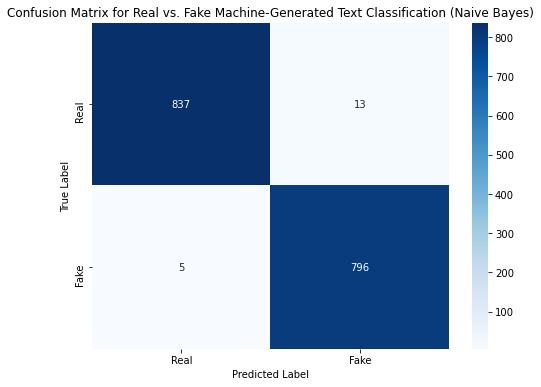

In [124]:
# Assign labels for real (0) and fake (1) machine-generated text
real_fake_labels = [0] * len(MR) + [1] * len(MF)

# Split machine data into train and test sets
X_train_real_fake, X_test_real_fake, y_train_real_fake, y_test_real_fake = train_test_split(machine_data, real_fake_labels, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer_real_fake = TfidfVectorizer(max_features=5000)
X_train_real_fake_tfidf = tfidf_vectorizer_real_fake.fit_transform(X_train_real_fake)
X_test_real_fake_tfidf = tfidf_vectorizer_real_fake.transform(X_test_real_fake)

# Train Naive Bayes model
real_fake_model = MultinomialNB()
real_fake_model.fit(X_train_real_fake_tfidf, y_train_real_fake)
real_fake_predictions = real_fake_model.predict(X_test_real_fake_tfidf)

# Evaluate model performance
accuracy = accuracy_score(y_test_real_fake, real_fake_predictions)
print("Accuracy for Real vs. Fake Machine classification (Naive Bayes):", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test_real_fake, real_fake_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix for Real vs. Fake Machine-Generated Text Classification (Naive Bayes)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Qualitative Analysis

##### Along with the Logistic Regression model, the Naive Bayes model performed well, especially in minimizing false negatives for human-written texts (high recall). However, its lower recall for AI-generated texts suggests some cases were missed, which could be critical depending on the application context.

### Implications
##### This performance indicated that while Naive Bayes is quite reliable, it may require additional adjustments or supplementary techniques to improve its detection rates for AI-generated content, especially in scenarios where failing to detect such content could have significant consequences.

### Limitations and Considerations
##### The main limitation observed is the trade-off between recall and precision in detecting AI-generated texts. This could potentially be addressed by exploring more complex models or adjusting the threshold for classification to balance the recall and precision better.

In [99]:
from sklearn.metrics import classification_report

### First Predicting AI vs Human

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Visualization 1: Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt='.2f', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
# Visualization 2: ROC Curve
def plot_roc_curve(y_true, y_score, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Visualization 3: Feature Importance
def plot_feature_importance(model, vectorizer):
    feature_names = np.array(vectorizer.get_feature_names_out())
    coefs = model.coef_[0]
    coefs_sorted = np.argsort(np.abs(coefs))[::-1]
    top_features = feature_names[coefs_sorted[:20]]
    top_coefs = coefs[coefs_sorted[:20]]
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(top_features)), top_coefs, align='center')
    plt.yticks(range(len(top_features)), top_features)
    plt.xlabel('Feature Importance')
    plt.title('Top 20 Most Important Features')
    plt.show()

### Cross-Validation and Learning Curve Functions

In [47]:
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Cross-Validation
def perform_cross_validation(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")

# Learning Curve
def plot_learning_curve(model, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

# Logistic Regression AI vs Human Prediction

In [62]:
from sklearn.metrics import accuracy_score, classification_report

machine_data = pd.concat([MR, MF], ignore_index=True)
human_data = pd.concat([HR, HF], ignore_index=True)

# Assign labels
machine_labels = [0] * len(MR) + [0] * len(MF)
human_labels = [1] * len(HR) + [1] * len(HF)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(pd.concat([machine_data, human_data], ignore_index=True),
                                                    machine_labels + human_labels, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train and test logistic regression model
machine_human_model = LogisticRegression(max_iter=1000)
machine_human_model.fit(X_train_tfidf, y_train)
machine_human_predictions = machine_human_model.predict(X_test_tfidf)

# Evaluate model performance
print("Accuracy for Machine vs. Human classification:", accuracy_score(y_test, machine_human_predictions))

Accuracy for Machine vs. Human classification: 0.9775621588841722


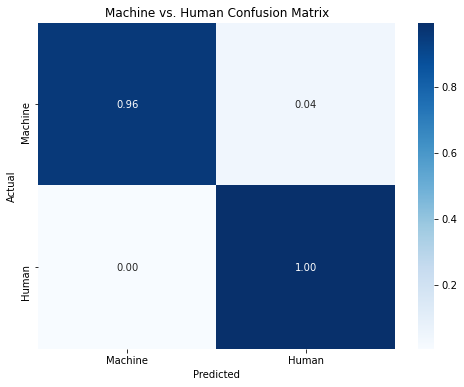

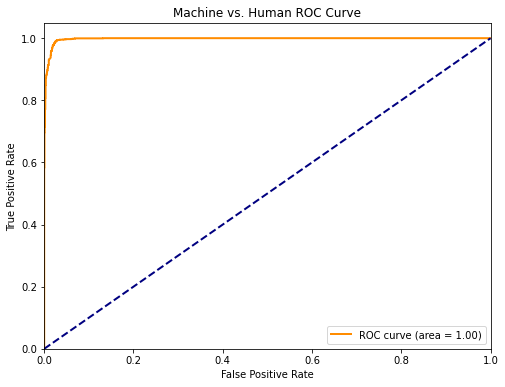

In [63]:
import numpy as np
# For machine vs. human classification
plot_confusion_matrix(y_test, machine_human_predictions, ['Machine', 'Human'], 'Machine vs. Human Confusion Matrix')
plot_roc_curve(y_test, machine_human_model.decision_function(X_test_tfidf), 'Machine vs. Human ROC Curve')

# Cross Validation within original data
These are the accuracy scores for each of the 5 folds in the cross-validation process.
In 5-fold cross-validation, the data is split into 5 equal parts (folds). The model is trained on 4 folds and tested on the remaining fold. This process is repeated 5 times, with each fold serving as the test set once.
The numbers represent the accuracy of the model on the test fold for each iteration.

Cross-Validation Scores: [0.98105343 0.97158014 0.97611827 0.98104625 0.98142532]
Mean Accuracy: 0.978 (+/- 0.004)


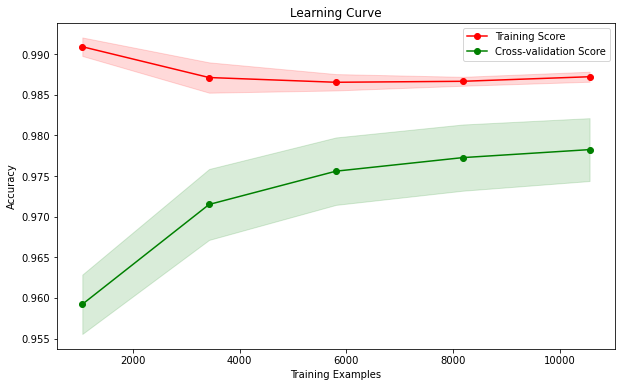

In [64]:
# For machine vs. human classification
perform_cross_validation(machine_human_model, X_train_tfidf, y_train)
plot_learning_curve(machine_human_model, X_train_tfidf, y_train)

### Feature Importance for Human News: 
A horizontal bar chart showing the top 20 most important features based on their coefficient values in the logistic regression model for the real vs. fake machine classification task.

In this case, the top features with the largest positive coefficients are the words or n-grams that are strongly indicative of human-generated text. These features have the highest weight or importance in predicting the "human" class.

On the other hand, features with smaller positive coefficients (closer to zero) have less importance or influence in predicting the "human" class. Features with very small positive coefficients (or negative coefficients before taking the absolute value) are more likely to be associated with machine-generated text.

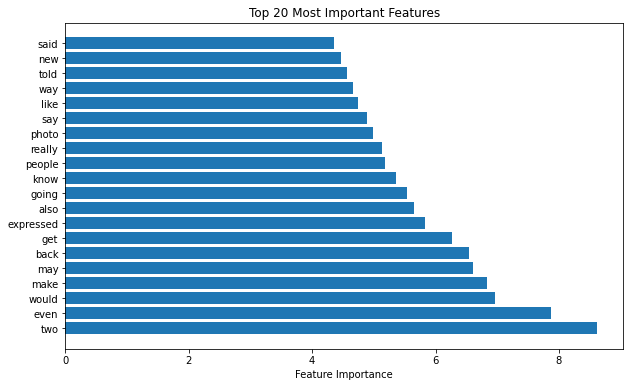

In [104]:
def plot_feature_importance(model, vectorizer):
    try:
        # For scikit-learn >= 1.0.0
        feature_names = np.array(vectorizer.get_feature_names_out())
    except AttributeError:
        # For scikit-learn < 1.0.0
        feature_names = np.array(vectorizer.get_feature_names())

    coefs = np.abs(model.coef_[0])  # Take the absolute values of the coefficients
    coefs_sorted = np.argsort(coefs)[::-1]
    top_features = feature_names[coefs_sorted[:20]]
    top_coefs = coefs[coefs_sorted[:20]]
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(top_features)), top_coefs, align='center')
    plt.yticks(range(len(top_features)), top_features)
    plt.xlabel('Feature Importance')
    plt.title('Top 20 Most Important Features')
    plt.show()
    
plot_feature_importance(machine_human_model, tfidf_vectorizer)

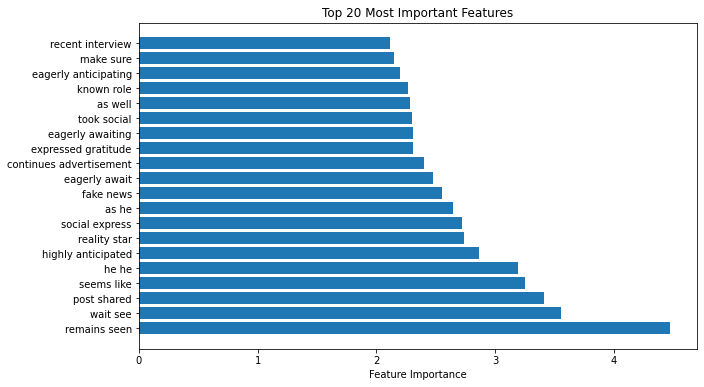

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

def plot_feature_importance(model, vectorizer):
    try:
        # For scikit-learn >= 1.0.0
        feature_names = np.array(vectorizer.get_feature_names_out())
    except AttributeError:
        # For scikit-learn < 1.0.0
        feature_names = np.array(vectorizer.get_feature_names())

    coefs = np.abs(model.coef_[0])  # Take the absolute values of the coefficients
    coefs_sorted = np.argsort(coefs)[::-1]
    top_features = feature_names[coefs_sorted[:20]]
    top_coefs = coefs[coefs_sorted[:20]]

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(top_features)), top_coefs, align='center')
    plt.yticks(range(len(top_features)), top_features)
    plt.xlabel('Feature Importance')
    plt.title('Top 20 Most Important Features')
    plt.show()

# Create a TF-IDF vectorizer with bigrams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 3))  # Include unigrams and bigrams
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Train the logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train_tfidf, y_train)

# Plot feature importance with bigrams
plot_feature_importance(logistic_regression_model, tfidf_vectorizer)

# Logistic Regression Human Real vs Fake

Accuracy for Real vs. Fake Human classification: 0.9211165048543689


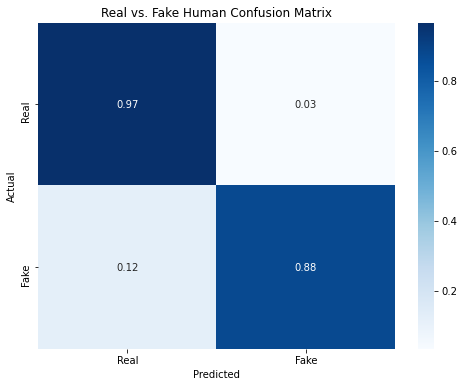

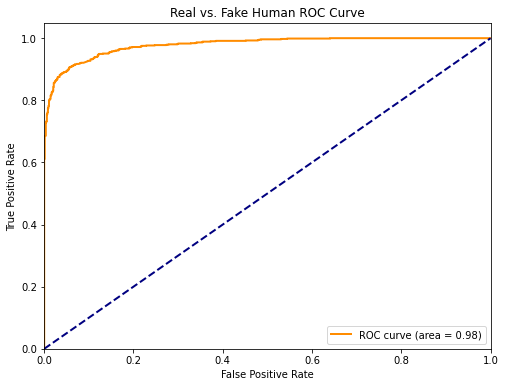

In [56]:
# Filter human-generated data from test set
# human_test_data = X_test[machine_human_predictions == 1]
# human_test_labels = y_test[machine_human_predictions == 1]

# Assign labels for real (0) and fake (1) human-generated text
real_fake_labels = [0] * len(HR) + [1] * len(HF)

# Split human data into train and test sets
X_train_real_fake, X_test_real_fake, y_train_real_fake, y_test_real_fake = train_test_split(human_data, real_fake_labels, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer_real_fake = TfidfVectorizer(max_features=5000)
X_train_real_fake_tfidf = tfidf_vectorizer_real_fake.fit_transform(X_train_real_fake)
X_test_real_fake_tfidf = tfidf_vectorizer_real_fake.transform(X_test_real_fake)

# Train and test logistic regression model
real_fake_model = LogisticRegression(max_iter=1000)
real_fake_model.fit(X_train_real_fake_tfidf, y_train_real_fake)
real_fake_predictions = real_fake_model.predict(X_test_real_fake_tfidf)

# Evaluate model performance
print("Accuracy for Real vs. Fake Human classification:", accuracy_score(y_test_real_fake, real_fake_predictions))

plot_confusion_matrix(y_test_real_fake, real_fake_predictions, ['Real', 'Fake'], 'Real vs. Fake Human Confusion Matrix')
plot_roc_curve(y_test_real_fake, real_fake_model.decision_function(X_test_real_fake_tfidf), 'Real vs. Fake Human ROC Curve')

### Feature Importance for Human Fake News

In this case, the top features with the largest positive coefficients are the words or n-grams that are strongly indicative of human-generated fake text. These features have the highest weight or importance in predicting the "human fake" class.

On the other hand, features with smaller positive coefficients (closer to zero) have less importance or influence in predicting the "human fake" class. Features with very small positive coefficients (or negative coefficients before taking the absolute value) are more likely to be associated with human real text.

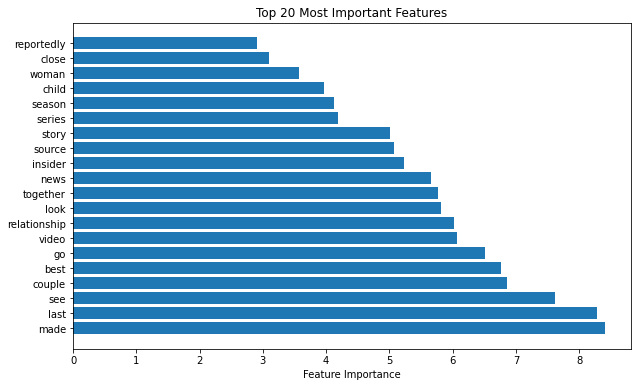

In [59]:
plot_feature_importance(real_fake_model, tfidf_vectorizer_real_fake)

## Cross Validation within original data
These are the accuracy scores for each of the 5 folds in the cross-validation process.
In 5-fold cross-validation, the data is split into 5 equal parts (folds). The model is trained on 4 folds and tested on the remaining fold. This process is repeated 5 times, with each fold serving as the test set once.
The numbers represent the accuracy of the model on the test fold for each iteration.

Cross-Validation Scores: [0.91881639 0.91274659 0.8983308  0.90136571 0.90964313]
Mean Accuracy: 0.908 (+/- 0.007)


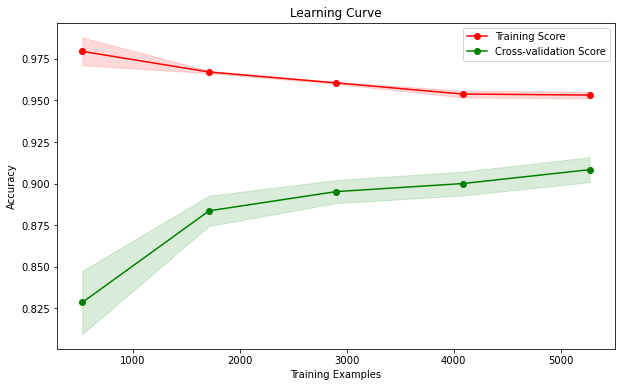

In [60]:
# For real vs. fake human classification
perform_cross_validation(real_fake_model, X_train_real_fake_tfidf, y_train_real_fake)
plot_learning_curve(real_fake_model, X_train_real_fake_tfidf, y_train_real_fake)

# Logistic Regression AI Real vs Fake

Accuracy for Real vs. Fake Machine classification: 0.9909145972138098


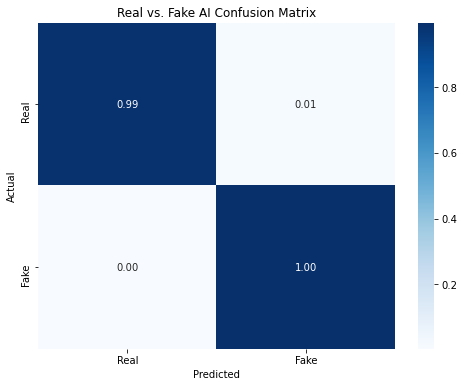

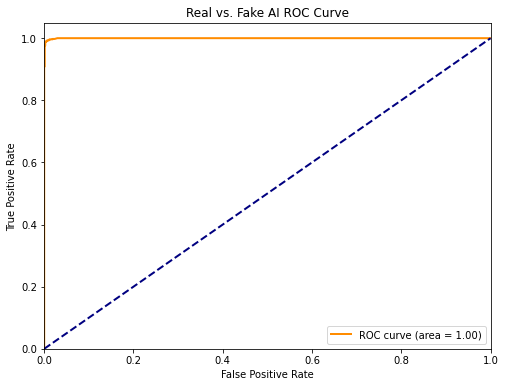

In [65]:
# Assign labels for real (0) and fake (1) machine-generated text
real_fake_labels = [0] * len(MR) + [1] * len(MF)

# Split machine data into train and test sets
X_train_real_fake, X_test_real_fake, y_train_real_fake, y_test_real_fake = train_test_split(machine_data, real_fake_labels, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer_real_fake = TfidfVectorizer(max_features=5000)
X_train_real_fake_tfidf = tfidf_vectorizer_real_fake.fit_transform(X_train_real_fake)
X_test_real_fake_tfidf = tfidf_vectorizer_real_fake.transform(X_test_real_fake)

# Train and test logistic regression model
real_fake_model = LogisticRegression(max_iter=1000)
real_fake_model.fit(X_train_real_fake_tfidf, y_train_real_fake)
real_fake_predictions = real_fake_model.predict(X_test_real_fake_tfidf)

# Evaluate model performance
print("Accuracy for Real vs. Fake Machine classification:", accuracy_score(y_test_real_fake, real_fake_predictions))

plot_confusion_matrix(y_test_real_fake, real_fake_predictions, ['Real', 'Fake'], 'Real vs. Fake AI Confusion Matrix')
plot_roc_curve(y_test_real_fake, real_fake_model.decision_function(X_test_real_fake_tfidf), 'Real vs. Fake AI ROC Curve')

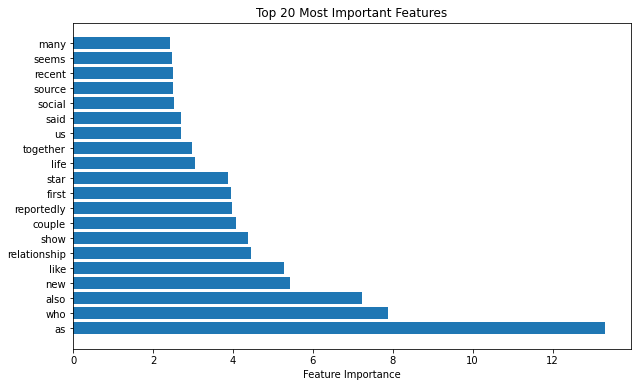

In [66]:
plot_feature_importance(real_fake_model, tfidf_vectorizer_real_fake)

Cross-Validation Scores: [0.99242998 0.99167298 0.99242424 0.99090909 0.99090909]
Mean Accuracy: 0.992 (+/- 0.001)


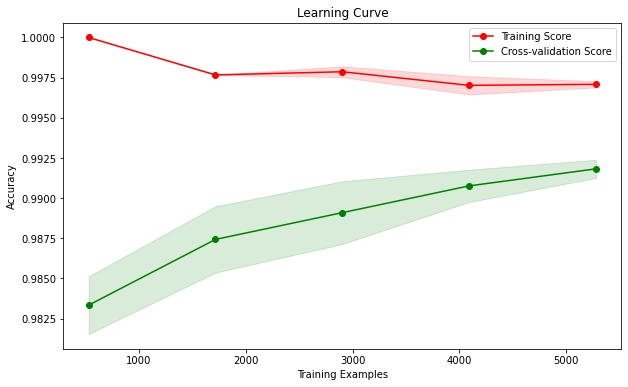

In [67]:
# For real vs. fake human classification
perform_cross_validation(real_fake_model, X_train_real_fake_tfidf, y_train_real_fake)
plot_learning_curve(real_fake_model, X_train_real_fake_tfidf, y_train_real_fake)

### Poltifact (New) dataset Validation

In [105]:
# Function to load JSON data into a DataFrame
def load_json_to_df(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    return pd.DataFrame.from_dict(data, orient='index')

# List of JSON files
json_files = ['PHF.json', 'PHR.json', 'PMF.json', 'PMR.json']
pol_dfs = []

# Load each JSON file into a DataFrame and store them in a list
for json_file in json_files:
    df_path = f'data/{json_file}'  # Corrected file path string formation
    df = load_json_to_df(df_path)
    pol_dfs.append(df)

# Naming the DataFrames, ensure you have all 8 DataFrames named if using them distinctly
PHF_df, PHR_df, PMF_df, PMR_df = pol_dfs

In [106]:
PHR_df

,id,text,title,description
0,politifact8769,"The award-winning, nonpartisan intel you can t...",Legislative Tracking Software,Track federal legislation with expert policy a...
1,politifact12052,"At the CNN debate in Miami, GOP candidates spa...","The CNN Miami Republican debate transcript, an...",Washington Post reporters add insight and anal...
2,politifact4858,It’s that time of year again – white elephant ...,Mitt v Mitt,"Yup, Mitt vs Mitt aja. Rame!"
3,politifact10945,"Thank you! Oh, thank you all! Thank you so ver...",Hillary Clinton Transcript: Read Full Text of ...,Hillary Clinton held the first major rally of ...
4,politifact14511,Maddow on Trump indictment: 'He knew it was wr...,'Discriminatory animus': Trump sued on DACA,New York Attorney General Eric Schneiderman ta...
...,...,...,...,...
189,politifact11777,Expanding Opportunity — #KempForum16 Paul Ryan...,Expanding Opportunity — #KempForum16,Let’s get the conversation going on how we can...
190,politifact3115,"MR. DAVID GREGORY: This Sunday, a new year and...","Meet the Press transcript for Jan. 2, 2011","Transcript of the January 2, 2011 broadcast of..."
191,politifact8557,"The award-winning, nonpartisan intel you can t...",Legislative Tracking Software,Track federal legislation with expert policy a...
192,politifact9576,"GOP Task Force, Lone Democrat Eye Trafficking ...",Immigration News: Congress Eyes Changes to Tra...,A Republican task force responding to immigrat...


In [107]:
# Add a 'label' column to PHR_df
PHR_df['hf_label'] = 0 #human
PHF_df['hf_label'] = 0 #human
PMR_df['hf_label'] = 1 #AI
PMF_df['hf_label'] = 1 #AI

PHR_df['rf_label'] = 0 #real 
PHF_df['rf_label'] = 1 #fake
PMR_df['rf_label'] = 0 #real
PMF_df['rf_label'] = 1 #fake

In [108]:
PHR_df

,id,text,title,description,hf_label,rf_label
0,politifact8769,"The award-winning, nonpartisan intel you can t...",Legislative Tracking Software,Track federal legislation with expert policy a...,0,0
1,politifact12052,"At the CNN debate in Miami, GOP candidates spa...","The CNN Miami Republican debate transcript, an...",Washington Post reporters add insight and anal...,0,0
2,politifact4858,It’s that time of year again – white elephant ...,Mitt v Mitt,"Yup, Mitt vs Mitt aja. Rame!",0,0
3,politifact10945,"Thank you! Oh, thank you all! Thank you so ver...",Hillary Clinton Transcript: Read Full Text of ...,Hillary Clinton held the first major rally of ...,0,0
4,politifact14511,Maddow on Trump indictment: 'He knew it was wr...,'Discriminatory animus': Trump sued on DACA,New York Attorney General Eric Schneiderman ta...,0,0
...,...,...,...,...,...,...
189,politifact11777,Expanding Opportunity — #KempForum16 Paul Ryan...,Expanding Opportunity — #KempForum16,Let’s get the conversation going on how we can...,0,0
190,politifact3115,"MR. DAVID GREGORY: This Sunday, a new year and...","Meet the Press transcript for Jan. 2, 2011","Transcript of the January 2, 2011 broadcast of...",0,0
191,politifact8557,"The award-winning, nonpartisan intel you can t...",Legislative Tracking Software,Track federal legislation with expert policy a...,0,0
192,politifact9576,"GOP Task Force, Lone Democrat Eye Trafficking ...",Immigration News: Congress Eyes Changes to Tra...,A Republican task force responding to immigrat...,0,0


In [109]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
        
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

# Apply this function to your PolitiFact DataFrames
PHR_df['text_clean'] = PHR_df['text'].apply(remove_stopwords).apply(clean_text)
PHF_df['text_clean'] = PHF_df['text'].apply(remove_stopwords).apply(clean_text)
PMF_df['text_clean'] = PMF_df['text'].apply(remove_stopwords).apply(clean_text)
PMR_df['text_clean'] = PMR_df['text'].apply(remove_stopwords).apply(clean_text)
phr_phf_combine_clean = PHR_df+PHF_df
pmr_pmf_combine_clean = PMR_df+PMF_df

all_combined_clean= phr_phf_combine_clean + pmr_pmf_combine_clean

In [110]:
hr_filtered_words = set(df_hr_filtered_common['Word'])
hf_filtered_words = set(df_hf_filtered_common['Word'])
mr_filtered_words = set(df_mr_filtered_common['Word'])
mf_filtered_words = set(df_mf_filtered_common['Word'])

# Function to filter text
def filter_text(text, filtered_words):
    # Split text into words
    words = text.split()
    # Filter words that are present in filtered_words
    filtered_text = [word for word in words if word in filtered_words]
    # Join the filtered words back into text
    return ' '.join(filtered_text)

# Apply the filter_text function to the 'text' column of HR_df
PHR_df['filtered_clean'] = PHR_df['text_clean'].apply(lambda x: filter_text(x, hr_filtered_words))
PHF_df['filtered_clean'] = PHF_df['text_clean'].apply(lambda x: filter_text(x, hf_filtered_words))
PMR_df['filtered_clean'] = PMR_df['text_clean'].apply(lambda x: filter_text(x, mr_filtered_words))
PMF_df['filtered_clean'] = PMF_df['text_clean'].apply(lambda x: filter_text(x, mf_filtered_words))

In [111]:
PHR_df

,id,text,title,description,hf_label,rf_label,text_clean,filtered_clean
0,politifact8769,"The award-winning, nonpartisan intel you can t...",Legislative Tracking Software,Track federal legislation with expert policy a...,0,0,awardwinning nonpartisan intel trust cq prov...,awardwinning trust bringing together deep poli...
1,politifact12052,"At the CNN debate in Miami, GOP candidates spa...","The CNN Miami Republican debate transcript, an...",Washington Post reporters add insight and anal...,0,0,cnn debate miami gop candidates sparred immig...,cnn debate miami social security talk key sara...
2,politifact4858,It’s that time of year again – white elephant ...,Mitt v Mitt,"Yup, Mitt vs Mitt aja. Rame!",0,0,time year white elephant gift exchange time ...,white gift exchange many buy choose something ...
3,politifact10945,"Thank you! Oh, thank you all! Thank you so ver...",Hillary Clinton Transcript: Read Full Text of ...,Hillary Clinton held the first major rally of ...,0,0,thank oh thank thank much wonderful new ...,thank oh thank thank much wonderful york many ...
4,politifact14511,Maddow on Trump indictment: 'He knew it was wr...,'Discriminatory animus': Trump sued on DACA,New York Attorney General Eric Schneiderman ta...,0,0,maddow trump indictment he knew wrong,trump indictment he knew wrong
...,...,...,...,...,...,...,...,...
189,politifact11777,Expanding Opportunity — #KempForum16 Paul Ryan...,Expanding Opportunity — #KempForum16,Let’s get the conversation going on how we can...,0,0,expanding opportunity kempforum paul ryan f...,opportunity paul ryan follow jan read listen s...
190,politifact3115,"MR. DAVID GREGORY: This Sunday, a new year and...","Meet the Press transcript for Jan. 2, 2011","Transcript of the January 2, 2011 broadcast of...",0,0,mr david gregory sunday new year new challen...,mr david sunday president th week tough promis...
191,politifact8557,"The award-winning, nonpartisan intel you can t...",Legislative Tracking Software,Track federal legislation with expert policy a...,0,0,awardwinning nonpartisan intel trust cq prov...,awardwinning trust bringing together deep poli...
192,politifact9576,"GOP Task Force, Lone Democrat Eye Trafficking ...",Immigration News: Congress Eyes Changes to Tra...,A Republican task force responding to immigrat...,0,0,gop task force lone democrat eye trafficking ...,task force eye law emma house task force charg...


In [112]:
PHR = PHR_df['text_clean']
PHF = PHF_df['text_clean']
PMR = PHR_df['text_clean']
PMF = PHR_df['text_clean']

# PHR = PHR_df['filtered_clean']
# PHF = PHF_df['filtered_clean']
# PMR = PHR_df['filtered_clean']
# PMF = PHR_df['filtered_clean']

print("Human Real News:")
print(PHR)
print("\nHuman Fake News:")
print(PHF)
print("\nAI Real News:")
print(PMR)
print("\nAI Fake News:")
print(PMF)

Human Real News:
0      awardwinning  nonpartisan intel trust  cq prov...
1      cnn debate miami  gop candidates sparred immig...
2       time year  white elephant gift exchange time ...
3      thank  oh  thank  thank  much  wonderful  new ...
4               maddow trump indictment  he knew wrong  
                             ...                        
189    expanding opportunity   kempforum paul ryan  f...
190    mr david gregory  sunday  new year new challen...
191    awardwinning  nonpartisan intel trust  cq prov...
192    gop task force  lone democrat eye trafficking ...
193    mitt romney  pick us rep paul ryan running mat...
Name: text_clean, Length: 194, dtype: object

Human Fake News:
0     republican attacks transgendered americans rel...
1     whoopi goldberg hot water comments made wednes...
2     washington  dc  former secret service agent wh...
3     bill clinton  hitman confessed  murders carrie...
4     trendolizer trendolizer  patent pending  autom...
             

In [113]:
from sklearn.model_selection import cross_val_score

# Concatenate new data into a single DataFrame
new_df = pd.concat([PHR, PHF, PMR, PMF], ignore_index=True)

# Assigning labels: 0 for human news, 1zsx for AI news
new_labels = [0]*len(PHR) + [0]*len(PHF) + [1]*len(PMR) + [1]*len(PMF)

# Vectorize the new data using the same TF-IDF vectorizer
new_tfidf_data = tfidf_vectorizer.transform(new_df)

# Perform cross-validation on original data
cross_val_scores = cross_val_score(logistic_regression_model, X_train_tfidf, y_train, cv=5)

print("Cross Validation Mean Accuracy:", cross_val_scores.mean())

# Test the model on the new data
new_predictions = logistic_regression_model.predict(new_tfidf_data)

# Evaluate the model on the new data
print("Accuracy on New Data:", accuracy_score(new_labels, new_predictions))
print("Classification Report on New Data:")
print(classification_report(new_labels, new_predictions))

Cross Validation Mean Accuracy: 0.978244682822341
Accuracy on New Data: 0.4653902798232695
Classification Report on New Data:
              precision    recall  f1-score   support

           0       0.44      0.88      0.59       291
           1       0.63      0.15      0.25       388

    accuracy                           0.47       679
   macro avg       0.53      0.52      0.42       679
weighted avg       0.55      0.47      0.39       679



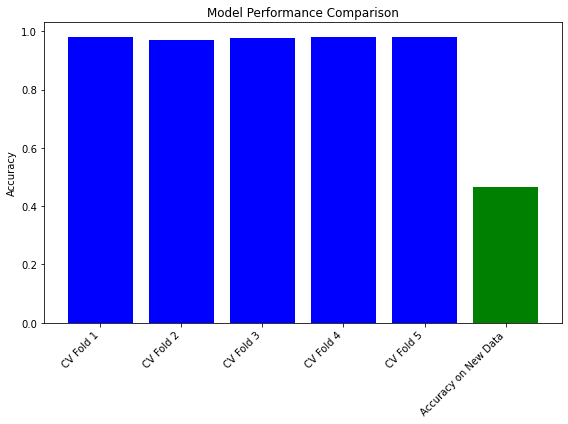

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Concatenate cross-validation scores with accuracy on new data
scores = np.append(cross_val_scores, accuracy_score(new_labels, new_predictions))

# Create labels for the plot
labels = ["CV Fold 1", "CV Fold 2", "CV Fold 3", "CV Fold 4", "CV Fold 5", "Accuracy on New Data"]

# Plot the scores
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(labels)), scores, color=['blue']*5 + ['green'])
plt.xticks(np.arange(len(labels)), labels, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()

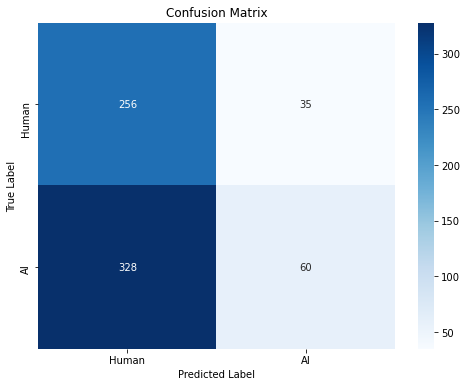

In [115]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(new_labels, new_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Human", "AI"], yticklabels=["Human", "AI"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Cross Validation on New Poltifact Data')
plt.show()

## Cross Validation on New Data (Real vs Fake)

In [118]:
from sklearn.model_selection import cross_val_score

# Separate the new data into human and machine news
PH = pd.concat([PHR, PHF], ignore_index=True)
PM = pd.concat([PMR, PMF], ignore_index=True)

# Assigning labels for human news: 0 for real, 1 for fake
labels_H = [0]*len(PHR) + [1]*len(PHF)

# Assigning labels for machine news: 0 for real, 1 for fake
labels_M = [0]*len(PMR) + [1]*len(PMF)

# Vectorize the human and machine news data using the same TF-IDF vectorizer
tfidf_data_PH = tfidf_vectorizer.transform(PH)
tfidf_data_PM = tfidf_vectorizer.transform(PM)

# Perform cross-validation separately for human and machine news
cross_val_scores_H = cross_val_score(logistic_regression_model, tfidf_data_PH, labels_H, cv=5)
cross_val_scores_M = cross_val_score(logistic_regression_model, tfidf_data_PM, labels_M, cv=5)

print("Cross Validation Mean Accuracy for Human Real vs Fake News:", cross_val_scores_H.mean())
print("Cross Validation Mean Accuracy for AI Real vs Fake News:", cross_val_scores_M.mean())

Cross Validation Mean Accuracy for Human Real vs Fake News: 0.7628872004675629
Cross Validation Mean Accuracy for AI Real vs Fake News: 0.4974025974025974


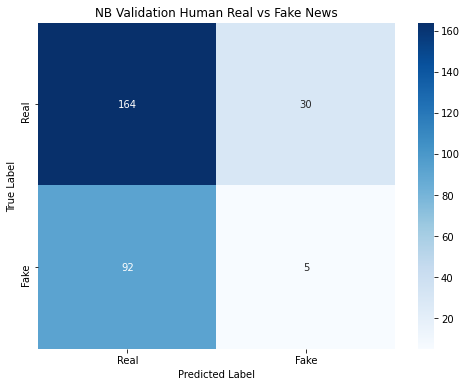

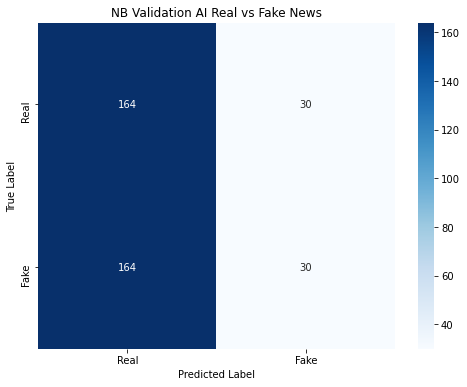

In [140]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get predictions for human and machine news
predictions_H = logistic_regression_model.predict(tfidf_data_PH)
predictions_M = logistic_regression_model.predict(tfidf_data_PM)

# Generate confusion matrices
cm_H = confusion_matrix(labels_H, predictions_H)
cm_M = confusion_matrix(labels_M, predictions_M)

# Plot confusion matrix for human news
plt.figure(figsize=(8, 6))
sns.heatmap(cm_H, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('NB Validation Human Real vs Fake News')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for machine news
plt.figure(figsize=(8, 6))
sns.heatmap(cm_M, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('NB Validation AI Real vs Fake News')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# NB cross validation

In [133]:
from sklearn.naive_bayes import MultinomialNB

# Cross-validation on the original data
cross_val_scores_nb_original = cross_val_score(naive_bayes_model, X_train_tfidf, y_train, cv=5)
print("Naive Bayes Cross Validation Mean Accuracy on Original Data:", cross_val_scores_nb_original.mean())

# Vectorization for the new data
new_tfidf_data = tfidf_vectorizer.transform(new_df)

# Training the Naive Bayes model on the original data
naive_bayes_model.fit(X_train_tfidf, y_train)

# Testing the Naive Bayes model on the new data
new_predictions_nb = naive_bayes_model.predict(new_tfidf_data)

# Evaluating the Naive Bayes model on the new data
print("Naive Bayes Accuracy on New Data:", accuracy_score(new_labels, new_predictions_nb))
print("Naive Bayes Classification Report on New Data:")
print(classification_report(new_labels, new_predictions_nb))

# Separate the new data into human and machine news
PH = pd.concat([PHR, PHF], ignore_index=True)
PM = pd.concat([PMR, PMF], ignore_index=True)

# Assigning labels for human news: 0 for real, 1 for fake
labels_H = [0]*len(PHR) + [1]*len(PHF)

# Assigning labels for machine news: 0 for real, 1 for fake
labels_M = [0]*len(PMR) + [1]*len(PMF)

# TF-IDF vectorization for the human and machine news data
tfidf_data_PH = tfidf_vectorizer.transform(PH)
tfidf_data_PM = tfidf_vectorizer.transform(PM)

# Cross-validation separately for human and machine news
cross_val_scores_nb_H = cross_val_score(naive_bayes_model, tfidf_data_PH, labels_H, cv=5)
cross_val_scores_nb_M = cross_val_score(naive_bayes_model, tfidf_data_PM, labels_M, cv=5)

print("Naive Bayes Cross Validation Mean Accuracy for Human News:", cross_val_scores_nb_H.mean())
print("Naive Bayes Cross Validation Mean Accuracy for Machine News:", cross_val_scores_nb_M.mean())

Naive Bayes Cross Validation Mean Accuracy on Original Data: 0.976046420965508
Naive Bayes Accuracy on New Data: 0.561119293078056
Naive Bayes Classification Report on New Data:
              precision    recall  f1-score   support

           0       0.48      0.37      0.42       291
           1       0.60      0.71      0.65       388

    accuracy                           0.56       679
   macro avg       0.54      0.54      0.53       679
weighted avg       0.55      0.56      0.55       679

Naive Bayes Cross Validation Mean Accuracy for Human News: 0.6700759789596727
Naive Bayes Cross Validation Mean Accuracy for Machine News: 0.4974025974025974


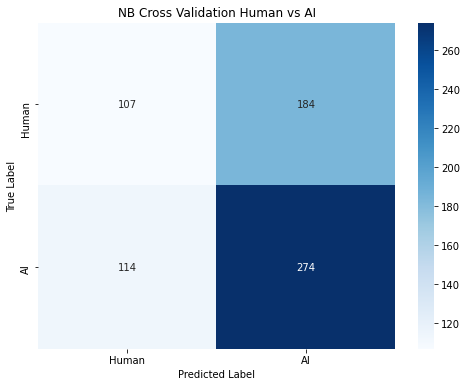

In [137]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(new_labels, new_predictions_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Human", "AI"], yticklabels=["Human", "AI"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('NB Cross Validation Human vs AI')
plt.show()

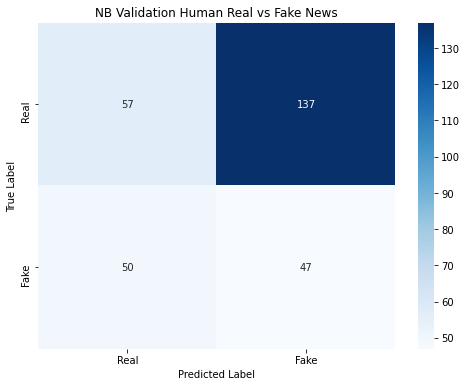

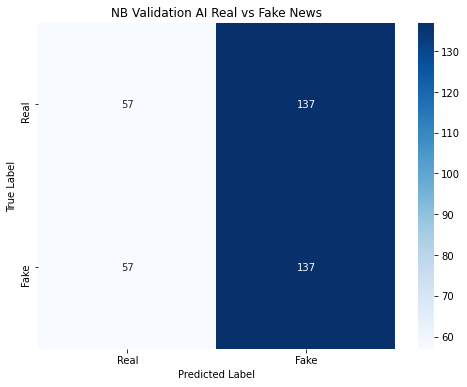

In [138]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get predictions for human and machine news
predictions_H = naive_bayes_model.predict(tfidf_data_PH)
predictions_M = naive_bayes_model.predict(tfidf_data_PM)

# Generate confusion matrices
cm_H = confusion_matrix(labels_H, predictions_H)
cm_M = confusion_matrix(labels_M, predictions_M)

# Plot confusion matrix for human news
plt.figure(figsize=(8, 6))
sns.heatmap(cm_H, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('NB Validation Human Real vs Fake News')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for machine news
plt.figure(figsize=(8, 6))
sns.heatmap(cm_M, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('NB Validation AI Real vs Fake News')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Naive Bayes Cross Validation Mean Accuracy on Original Data: 0.976046420965508
Naive Bayes Accuracy on New Data: 0.43888070692194403
Naive Bayes Classification Report on New Data:
              precision    recall  f1-score   support

           0       0.40      0.63      0.49       291
           1       0.52      0.29      0.37       388

    accuracy                           0.44       679
   macro avg       0.46      0.46      0.43       679
weighted avg       0.47      0.44      0.42       679



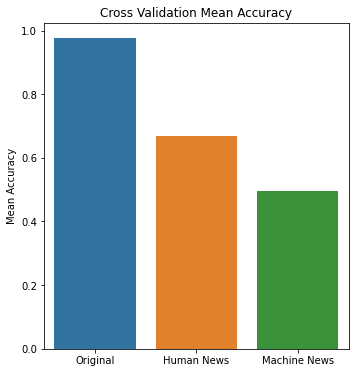

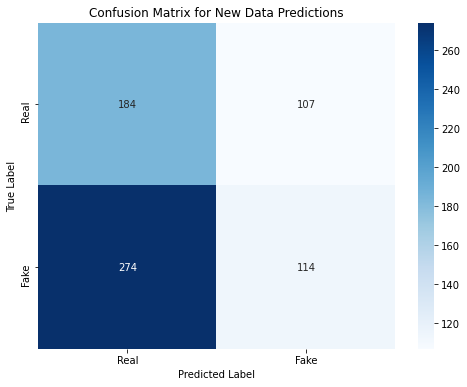

<Figure size 432x288 with 0 Axes>

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Cross-validation on the original data
cross_val_scores_nb_original = cross_val_score(naive_bayes_model, X_train_tfidf, y_train, cv=5)
print("Naive Bayes Cross Validation Mean Accuracy on Original Data:", cross_val_scores_nb_original.mean())

# Vectorization for the new data
new_tfidf_data = tfidf_vectorizer.transform(new_df)

# Training the Naive Bayes model on the original data
naive_bayes_model.fit(X_train_tfidf, y_train)

# Testing the Naive Bayes model on the new data
new_predictions_nb = naive_bayes_model.predict(new_tfidf_data)

# Evaluating the Naive Bayes model on the new data
print("Naive Bayes Accuracy on New Data:", accuracy_score(new_labels, new_predictions_nb))
print("Naive Bayes Classification Report on New Data:")
print(classification_report(new_labels, new_predictions_nb))

# Separate the new data into human and machine news
PH = pd.concat([PHR, PHF], ignore_index=True)
PM = pd.concat([PMR, PMF], ignore_index=True)

# Assigning labels for human news: 0 for real, 1 for fake
labels_H = [0]*len(PHR) + [1]*len(PHF)

# Assigning labels for machine news: 0 for real, 1 for fake
labels_M = [0]*len(PMR) + [1]*len(PMF)

# TF-IDF vectorization for the human and machine news data
tfidf_data_PH = tfidf_vectorizer.transform(PH)
tfidf_data_PM = tfidf_vectorizer.transform(PM)

# Cross-validation separately for human and machine news
cross_val_scores_nb_H = cross_val_score(naive_bayes_model, tfidf_data_PH, labels_H, cv=5)
cross_val_scores_nb_M = cross_val_score(naive_bayes_model, tfidf_data_PM, labels_M, cv=5)

# Plotting
plt.figure(figsize=(12, 6))

# Cross-validation results
plt.subplot(1, 2, 1)
sns.barplot(x=['Original', 'Human News', 'Machine News'], y=[cross_val_scores_nb_original.mean(), cross_val_scores_nb_H.mean(), cross_val_scores_nb_M.mean()])
plt.title('Cross Validation Mean Accuracy')
plt.ylabel('Mean Accuracy')

cm_new_data = confusion_matrix(new_labels, new_predictions_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_new_data, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix for New Data Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

plt.tight_layout()
plt.show()

# Everything beyond this point is outdated!

In [77]:
from sklearn.metrics import accuracy_score, classification_report

# Assigning labels for each comparison
labels_hr_vs_mf = [0] * len(HR) + [1] * len(MF)
labels_hf_vs_mf = [0] * len(HF) + [1] * len(MF)
labels_mr_vs_mf = [0] * len(MR) + [1] * len(MF)
labels_hf_vs_mr = [0] * len(HF) + [1] * len(MR)
labels_hr_vs_mr = [0] * len(HR) + [1] * len(MR)
labels_hr_vs_hf = [0] * len(HR) + [1] * len(HF)

# Splitting the data for each comparison
X_train_hr_vs_mf, X_test_hr_vs_mf, y_train_hr_vs_mf, y_test_hr_vs_mf = train_test_split(pd.concat([HR, MF], ignore_index=True), labels_hr_vs_mf, test_size=0.2, random_state=42)
X_train_hf_vs_mf, X_test_hf_vs_mf, y_train_hf_vs_mf, y_test_hf_vs_mf = train_test_split(pd.concat([HF, MF], ignore_index=True), labels_hf_vs_mf, test_size=0.2, random_state=42)
X_train_mr_vs_mf, X_test_mr_vs_mf, y_train_mr_vs_mf, y_test_mr_vs_mf = train_test_split(pd.concat([MR, MF], ignore_index=True), labels_mr_vs_mf, test_size=0.2, random_state=42)
X_train_hf_vs_mr, X_test_hf_vs_mr, y_train_hf_vs_mr, y_test_hf_vs_mr = train_test_split(pd.concat([HF, MR], ignore_index=True), labels_hf_vs_mr, test_size=0.2, random_state=42)
X_train_hr_vs_mr, X_test_hr_vs_mr, y_train_hr_vs_mr, y_test_hr_vs_mr = train_test_split(pd.concat([HR, MR], ignore_index=True), labels_hr_vs_mr, test_size=0.2, random_state=42)
X_train_hr_vs_hf, X_test_hr_vs_hf, y_train_hr_vs_hf, y_test_hr_vs_hf = train_test_split(pd.concat([HR, HF], ignore_index=True), labels_hr_vs_hf, test_size=0.2, random_state=42)

# Creating TF-IDF vectorizer for each comparison
tfidf_vectorizer_hr_vs_mf = TfidfVectorizer(max_features=5000)
X_train_hr_vs_mf_tfidf = tfidf_vectorizer_hr_vs_mf.fit_transform(X_train_hr_vs_mf)
X_test_hr_vs_mf_tfidf = tfidf_vectorizer_hr_vs_mf.transform(X_test_hr_vs_mf)

tfidf_vectorizer_hf_vs_mf = TfidfVectorizer(max_features=5000)
X_train_hf_vs_mf_tfidf = tfidf_vectorizer_hf_vs_mf.fit_transform(X_train_hf_vs_mf)
X_test_hf_vs_mf_tfidf = tfidf_vectorizer_hf_vs_mf.transform(X_test_hf_vs_mf)

tfidf_vectorizer_mr_vs_mf = TfidfVectorizer(max_features=5000)
X_train_mr_vs_mf_tfidf = tfidf_vectorizer_mr_vs_mf.fit_transform(X_train_mr_vs_mf)
X_test_mr_vs_mf_tfidf = tfidf_vectorizer_mr_vs_mf.transform(X_test_mr_vs_mf)

tfidf_vectorizer_hf_vs_mr = TfidfVectorizer(max_features=5000)
X_train_hf_vs_mr_tfidf = tfidf_vectorizer_hf_vs_mr.fit_transform(X_train_hf_vs_mr)
X_test_hf_vs_mr_tfidf = tfidf_vectorizer_hf_vs_mr.transform(X_test_hf_vs_mr)

tfidf_vectorizer_hr_vs_mr = TfidfVectorizer(max_features=5000)
X_train_hr_vs_mr_tfidf = tfidf_vectorizer_hr_vs_mr.fit_transform(X_train_hr_vs_mr)
X_test_hr_vs_mr_tfidf = tfidf_vectorizer_hr_vs_mr.transform(X_test_hr_vs_mr)

tfidf_vectorizer_hr_vs_hf = TfidfVectorizer(max_features=5000)
X_train_hr_vs_hf_tfidf = tfidf_vectorizer_hr_vs_hf.fit_transform(X_train_hr_vs_hf)
X_test_hr_vs_hf_tfidf = tfidf_vectorizer_hr_vs_hf.transform(X_test_hr_vs_hf)

# Logistic Regression models for each comparison
logistic_regression_model_hr_vs_mf = LogisticRegression(max_iter=1000)
logistic_regression_model_hr_vs_mf.fit(X_train_hr_vs_mf_tfidf, y_train_hr_vs_mf)

logistic_regression_model_hf_vs_mf = LogisticRegression(max_iter=1000)
logistic_regression_model_hf_vs_mf.fit(X_train_hf_vs_mf_tfidf, y_train_hf_vs_mf)

logistic_regression_model_mr_vs_mf = LogisticRegression(max_iter=1000)
logistic_regression_model_mr_vs_mf.fit(X_train_mr_vs_mf_tfidf, y_train_mr_vs_mf)

logistic_regression_model_hf_vs_mr = LogisticRegression(max_iter=1000)
logistic_regression_model_hf_vs_mr.fit(X_train_hf_vs_mr_tfidf, y_train_hf_vs_mr)

logistic_regression_model_hr_vs_mr = LogisticRegression(max_iter=1000)
logistic_regression_model_hr_vs_mr.fit(X_train_hr_vs_mr_tfidf, y_train_hr_vs_mr)

logistic_regression_model_hr_vs_hf = LogisticRegression(max_iter=1000)
logistic_regression_model_hr_vs_hf.fit(X_train_hr_vs_hf_tfidf, y_train_hr_vs_hf)

# Predictions for each comparison
logistic_regression_predictions_hr_vs_mf = logistic_regression_model_hr_vs_mf.predict(X_test_hr_vs_mf_tfidf)
logistic_regression_predictions_hf_vs_mf = logistic_regression_model_hf_vs_mf.predict(X_test_hf_vs_mf_tfidf)
logistic_regression_predictions_mr_vs_mf = logistic_regression_model_mr_vs_mf.predict(X_test_mr_vs_mf_tfidf)
logistic_regression_predictions_hf_vs_mr = logistic_regression_model_hf_vs_mr.predict(X_test_hf_vs_mr_tfidf)
logistic_regression_predictions_hr_vs_mr = logistic_regression_model_hr_vs_mr.predict(X_test_hr_vs_mr_tfidf)
logistic_regression_predictions_hr_vs_hf = logistic_regression_model_hr_vs_hf.predict(X_test_hr_vs_hf_tfidf)

# Evaluate Logistic Regression models for each comparison
print("Logistic Regression Accuracy for Human Real vs AI Fake:", accuracy_score(y_test_hr_vs_mf, logistic_regression_predictions_hr_vs_mf))
print("Logistic Regression Accuracy for Human Fake vs AI Fake:", accuracy_score(y_test_hf_vs_mf, logistic_regression_predictions_hf_vs_mf))
print("Logistic Regression Accuracy for AI Real vs AI Fake:", accuracy_score(y_test_mr_vs_mf, logistic_regression_predictions_mr_vs_mf))
print("Logistic Regression Accuracy for Human Fake vs AI Real:", accuracy_score(y_test_hf_vs_mr, logistic_regression_predictions_hf_vs_mr))
print("Logistic Regression Accuracy for Human Real vs AI Real:", accuracy_score(y_test_hr_vs_mr, logistic_regression_predictions_hr_vs_mr))
print("Logistic Regression Accuracy for Human Real vs Human Fake:", accuracy_score(y_test_hr_vs_hf, logistic_regression_predictions_hr_vs_hf))

Logistic Regression Accuracy for Human Real vs AI Fake: 0.9939320388349514
Logistic Regression Accuracy for Human Fake vs AI Fake: 0.996328029375765
Logistic Regression Accuracy for AI Real vs AI Fake: 0.9909145972138098
Logistic Regression Accuracy for Human Fake vs AI Real: 0.9794064203513022
Logistic Regression Accuracy for Human Real vs AI Real: 0.972972972972973
Logistic Regression Accuracy for Human Real vs Human Fake: 0.9211165048543689


In [79]:
import matplotlib.pyplot as plt

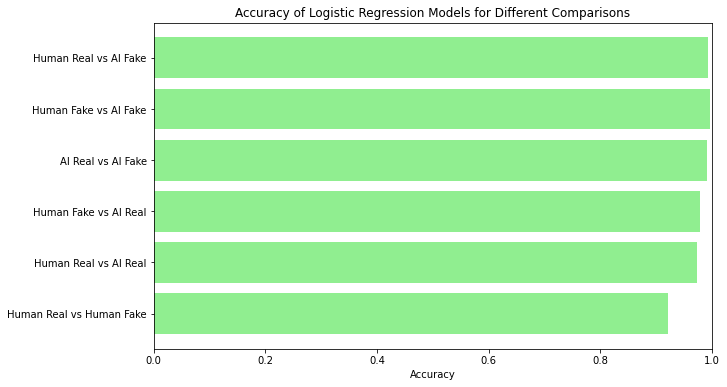

In [80]:
# Accuracy scores
accuracies_lr = [
    accuracy_score(y_test_hr_vs_mf, logistic_regression_predictions_hr_vs_mf),
    accuracy_score(y_test_hf_vs_mf, logistic_regression_predictions_hf_vs_mf),
    accuracy_score(y_test_mr_vs_mf, logistic_regression_predictions_mr_vs_mf),
    accuracy_score(y_test_hf_vs_mr, logistic_regression_predictions_hf_vs_mr),
    accuracy_score(y_test_hr_vs_mr, logistic_regression_predictions_hr_vs_mr),
    accuracy_score(y_test_hr_vs_hf, logistic_regression_predictions_hr_vs_hf)
]

# Comparison labels
comparisons_lr = [
    "Human Real vs AI Fake",
    "Human Fake vs AI Fake",
    "AI Real vs AI Fake",
    "Human Fake vs AI Real",
    "Human Real vs AI Real",
    "Human Real vs Human Fake"
]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(comparisons_lr, accuracies_lr, color='lightgreen')
plt.xlabel('Accuracy')
plt.title('Accuracy of Logistic Regression Models for Different Comparisons')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy at the top
plt.show()

### Evaluation Metrics

It's important to evaluate precision, recall, and F1-score for each class because these metrics provide insights into the performance of the classification model beyond just overall accuracy. They are particularly useful when dealing with imbalanced datasets or when the costs of false positives and false negatives are different.

#### Precision
Precision measures the accuracy of positive predictions made by the model. It is the ratio of true positives (correctly predicted positive instances) to the total number of instances predicted as positive (true positives plus false positives). A high precision indicates that the model makes fewer false positive predictions.
Precison = True Positives / (True Positives + False Positives)

#### Recall
Recall measures the ability of the model to correctly identify positive instances from the total actual positives. It is the ratio of true positives to the total number of actual positive instances (true positives plus false negatives). A high recall indicates that the model captures most of the positive instances.
Recall = True Positives / (True Positives + False Negatives)

#### F1-score
F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, giving equal weight to both metrics. F1-score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is useful when there is an uneven class distribution, as it considers both false positives and false negatives.
F1-score = 2 * (Precision * Recall) / (Precision + Recall)



In [81]:
from sklearn.metrics import classification_report

# Precision, recall, and F1-score for Human Real vs AI Fake
print("Classification Report - Human Real vs AI Fake:")
print(classification_report(y_test_hr_vs_mf, logistic_regression_predictions_hr_vs_mf, target_names=['Human Real', 'AI Fake']))

# Precision, recall, and F1-score for Human Fake vs AI Fake
print("Classification Report - Human Fake vs AI Fake:")
print(classification_report(y_test_hf_vs_mf, logistic_regression_predictions_hf_vs_mf, target_names=['Human Fake', 'AI Fake']))

# Precision, recall, and F1-score for AI Real vs AI Fake
print("Classification Report - AI Real vs AI Fake:")
print(classification_report(y_test_mr_vs_mf, logistic_regression_predictions_mr_vs_mf, target_names=['AI Real', 'AI Fake']))

# Precision, recall, and F1-score for Human Fake vs AI Real
print("Classification Report - Human Fake vs AI Real:")
print(classification_report(y_test_hf_vs_mr, logistic_regression_predictions_hf_vs_mr, target_names=['Human Fake', 'AI Real']))

# Precision, recall, and F1-score for Human Real vs AI Real
print("Classification Report - Human Real vs AI Real:")
print(classification_report(y_test_hr_vs_mr, logistic_regression_predictions_hr_vs_mr, target_names=['Human Real', 'AI Real']))

# Precision, recall, and F1-score for Human Real vs Human Fake
print("Classification Report - Human Real vs Human Fake:")
print(classification_report(y_test_hr_vs_hf, logistic_regression_predictions_hr_vs_hf, target_names=['Human Real', 'Human Fake']))

Classification Report - Human Real vs AI Fake:
              precision    recall  f1-score   support

  Human Real       0.99      1.00      0.99       840
     AI Fake       1.00      0.99      0.99       808

    accuracy                           0.99      1648
   macro avg       0.99      0.99      0.99      1648
weighted avg       0.99      0.99      0.99      1648

Classification Report - Human Fake vs AI Fake:
              precision    recall  f1-score   support

  Human Fake       1.00      1.00      1.00       804
     AI Fake       1.00      1.00      1.00       830

    accuracy                           1.00      1634
   macro avg       1.00      1.00      1.00      1634
weighted avg       1.00      1.00      1.00      1634

Classification Report - AI Real vs AI Fake:
              precision    recall  f1-score   support

     AI Real       1.00      0.99      0.99       850
     AI Fake       0.99      1.00      0.99       801

    accuracy                           0.99 

### Plot-Recall Curve

It plots the precision (positive predictive value) against the recall (true positive rate) for different threshold values.

In [82]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

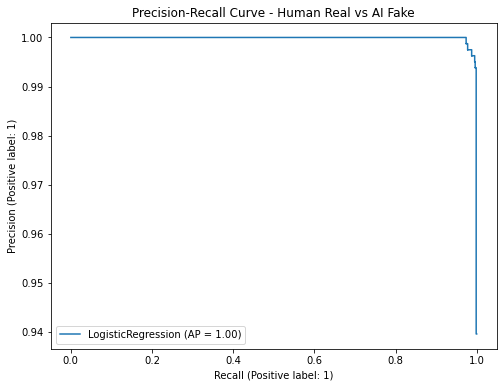

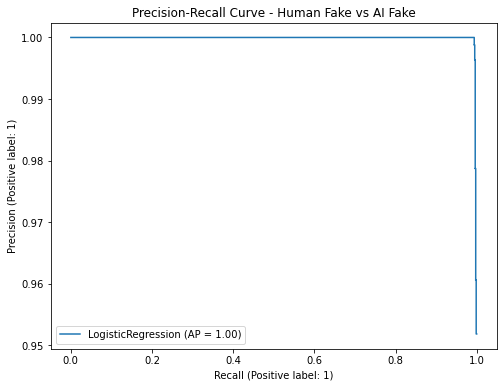

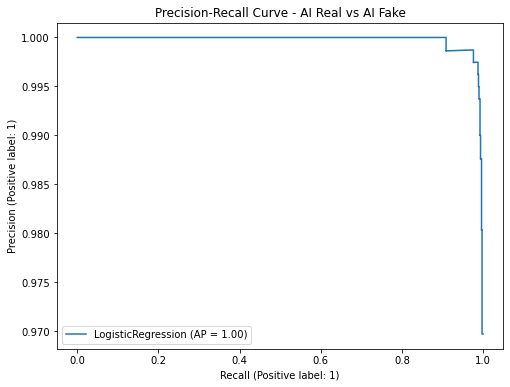

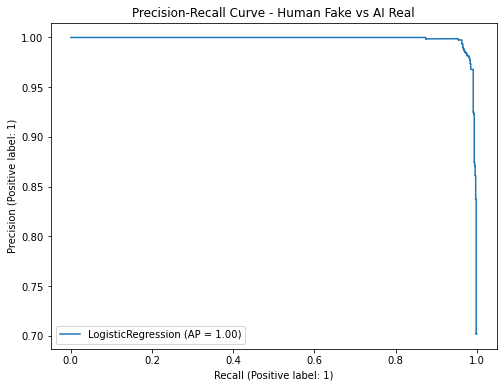

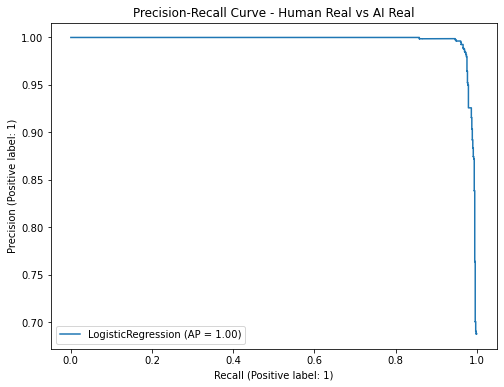

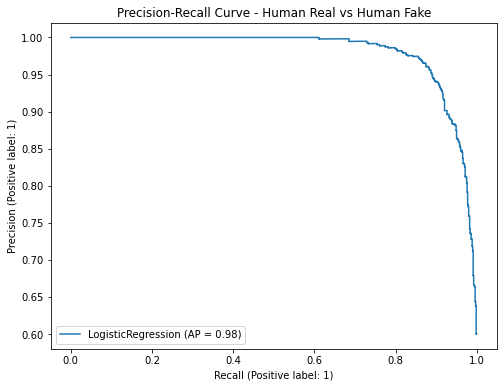

In [83]:
from sklearn.metrics import plot_precision_recall_curve

# Precision-Recall Curve for Human Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(logistic_regression_model_hr_vs_mf, X_test_hr_vs_mf_tfidf, y_test_hr_vs_mf, ax=ax)
ax.set_title('Precision-Recall Curve - Human Real vs AI Fake')
plt.show()

# Precision-Recall Curve for Human Fake vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(logistic_regression_model_hf_vs_mf, X_test_hf_vs_mf_tfidf, y_test_hf_vs_mf, ax=ax)
ax.set_title('Precision-Recall Curve - Human Fake vs AI Fake')
plt.show()

# Precision-Recall Curve for AI Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(logistic_regression_model_mr_vs_mf, X_test_mr_vs_mf_tfidf, y_test_mr_vs_mf, ax=ax)
ax.set_title('Precision-Recall Curve - AI Real vs AI Fake')
plt.show()

# Precision-Recall Curve for Human Fake vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(logistic_regression_model_hf_vs_mr, X_test_hf_vs_mr_tfidf, y_test_hf_vs_mr, ax=ax)
ax.set_title('Precision-Recall Curve - Human Fake vs AI Real')
plt.show()

# Precision-Recall Curve for Human Real vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(logistic_regression_model_hr_vs_mr, X_test_hr_vs_mr_tfidf, y_test_hr_vs_mr, ax=ax)
ax.set_title('Precision-Recall Curve - Human Real vs AI Real')
plt.show()

# Precision-Recall Curve for Human Real vs Human Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(logistic_regression_model_hr_vs_hf, X_test_hr_vs_hf_tfidf, y_test_hr_vs_hf, ax=ax)
ax.set_title('Precision-Recall Curve - Human Real vs Human Fake')
plt.show()

### Confusion Matrix Evaluation

#### Diagonal Dominance
The main diagonal of the confusion matrix represents the correct predictions (true positives and true negatives). A good confusion matrix will have high values along the diagonal, indicating that the model is making correct predictions for most instances.

#### Off-diagonal Values
Off-diagonal elements represent misclassifications. A good confusion matrix will have low values in the off-diagonal elements, indicating that the model is making fewer incorrect predictions.

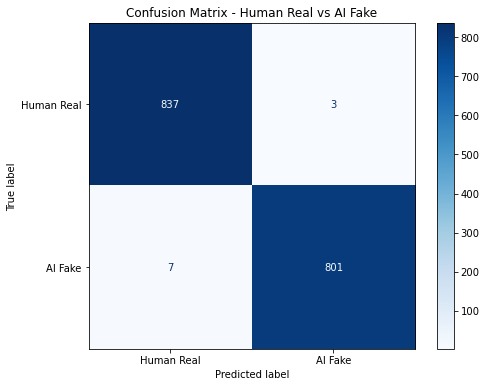

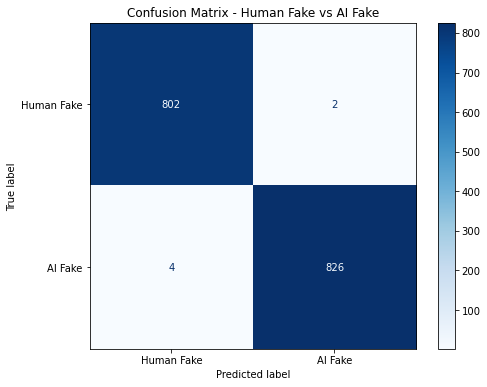

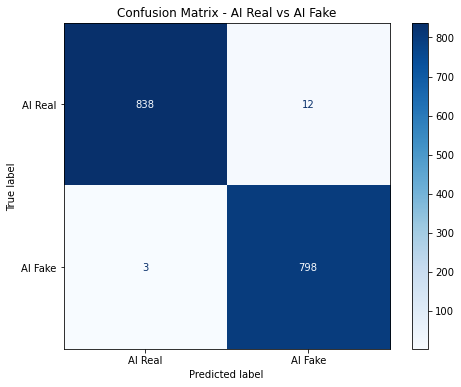

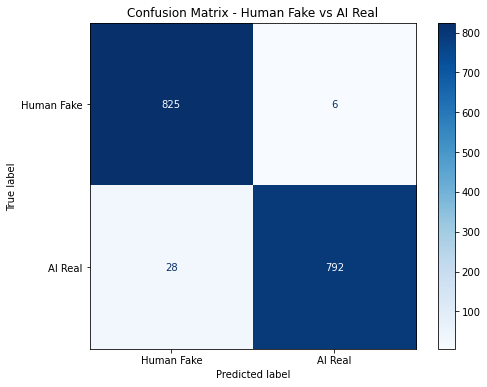

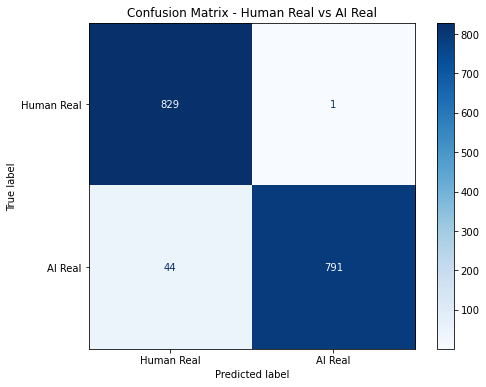

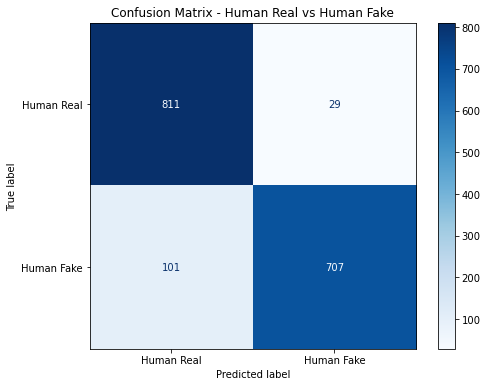

In [84]:
from sklearn.metrics import plot_confusion_matrix

# Confusion Matrix for Human Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(logistic_regression_model_hr_vs_mf, X_test_hr_vs_mf_tfidf, y_test_hr_vs_mf, ax=ax, cmap=plt.cm.Blues, display_labels=['Human Real', 'AI Fake'])
ax.set_title('Confusion Matrix - Human Real vs AI Fake')
plt.show()

# Confusion Matrix for Human Fake vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(logistic_regression_model_hf_vs_mf, X_test_hf_vs_mf_tfidf, y_test_hf_vs_mf, ax=ax, cmap=plt.cm.Blues, display_labels=['Human Fake', 'AI Fake'])
ax.set_title('Confusion Matrix - Human Fake vs AI Fake')
plt.show()

# Confusion Matrix for AI Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(logistic_regression_model_mr_vs_mf, X_test_mr_vs_mf_tfidf, y_test_mr_vs_mf, ax=ax, cmap=plt.cm.Blues, display_labels=['AI Real', 'AI Fake'])
ax.set_title('Confusion Matrix - AI Real vs AI Fake')
plt.show()

# Confusion Matrix for Human Fake vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(logistic_regression_model_hf_vs_mr, X_test_hf_vs_mr_tfidf, y_test_hf_vs_mr, ax=ax, cmap=plt.cm.Blues, display_labels=['Human Fake', 'AI Real'])
ax.set_title('Confusion Matrix - Human Fake vs AI Real')
plt.show()

# Confusion Matrix for Human Real vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(logistic_regression_model_hr_vs_mr, X_test_hr_vs_mr_tfidf, y_test_hr_vs_mr, ax=ax, cmap=plt.cm.Blues, display_labels=['Human Real', 'AI Real'])
ax.set_title('Confusion Matrix - Human Real vs AI Real')
plt.show()

# Confusion Matrix for Human Real vs Human Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(logistic_regression_model_hr_vs_hf, X_test_hr_vs_hf_tfidf, y_test_hr_vs_hf, ax=ax, cmap=plt.cm.Blues, display_labels=['Human Real', 'Human Fake'])
ax.set_title('Confusion Matrix - Human Real vs Human Fake')
plt.show()

### Receiver Operating Characteristic (ROC) Curve Evaluation

#### Area Under the Curve (AUC)
One of the primary metrics for evaluating a ROC curve is the AUC. A perfect classifier would have an AUC of 1, indicating perfect discrimination between positive and negative classes. Higher AUC values generally indicate better classifier performance.

#### Shape of the Curve
A good ROC curve typically rises steeply at the beginning and then gradually flattens out towards the top-left corner. A curve that hugs the top-left corner more closely indicates better performance.

#### Distance from the Random Guess Line
The ROC curve should be significantly above the diagonal line representing random guessing (the line connecting [0,0] and [1,1]). A ROC curve that closely follows the diagonal line suggests that the model performs no better than random guessing.

#### Trade-off between True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity): 
The ROC curve illustrates the trade-off between sensitivity (true positive rate) and specificity (true negative rate). Depending on the application, you may want to prioritize one over the other. A good ROC curve should strike a balance between sensitivity and specificity.

#### Youden's J statistic:
Youden's J statistic is calculated as (Sensitivity + Specificity - 1) and it represents the maximum potential effectiveness of a test. Maximizing this value helps in determining the optimal threshold.

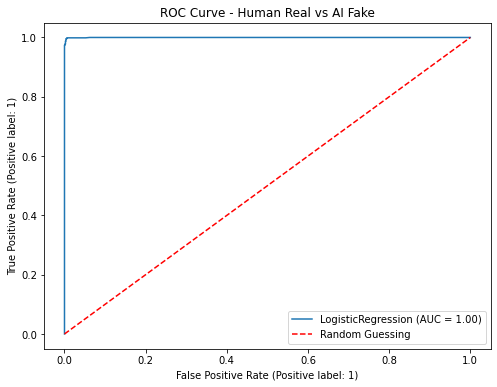

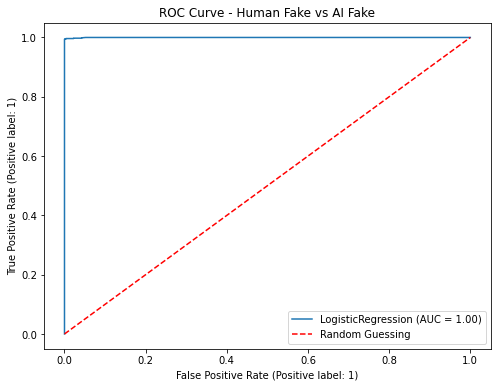

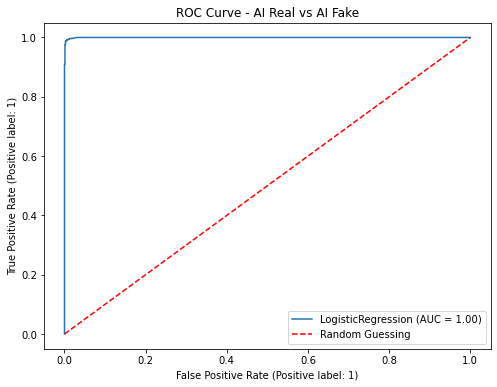

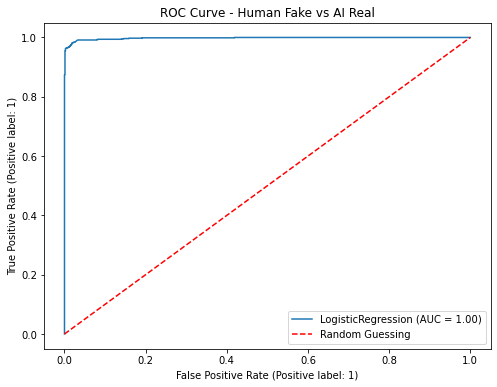

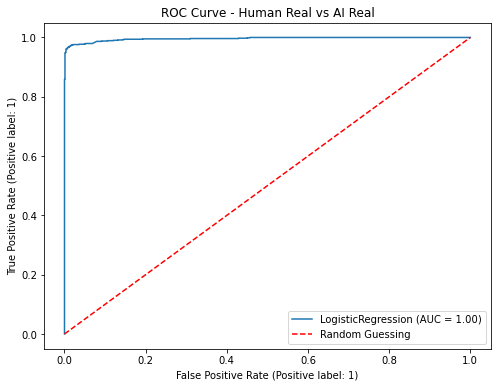

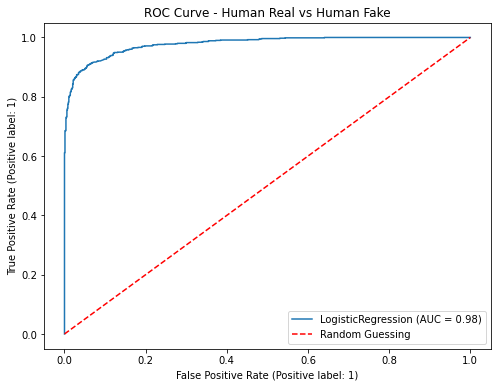

In [85]:
from sklearn.metrics import plot_roc_curve

# ROC Curve for Human Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(logistic_regression_model_hr_vs_mf, X_test_hr_vs_mf_tfidf, y_test_hr_vs_mf, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Real vs AI Fake')
plt.legend()
plt.show()

# ROC Curve for Human Fake vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(logistic_regression_model_hf_vs_mf, X_test_hf_vs_mf_tfidf, y_test_hf_vs_mf, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Fake vs AI Fake')
plt.legend()
plt.show()

# ROC Curve for AI Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(logistic_regression_model_mr_vs_mf, X_test_mr_vs_mf_tfidf, y_test_mr_vs_mf, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - AI Real vs AI Fake')
plt.legend()
plt.show()

# ROC Curve for Human Fake vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(logistic_regression_model_hf_vs_mr, X_test_hf_vs_mr_tfidf, y_test_hf_vs_mr, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Fake vs AI Real')
plt.legend()
plt.show()

# ROC Curve for Human Real vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(logistic_regression_model_hr_vs_mr, X_test_hr_vs_mr_tfidf, y_test_hr_vs_mr, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Real vs AI Real')
plt.legend()
plt.show()

# ROC Curve for Human Real vs Human Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(logistic_regression_model_hr_vs_hf, X_test_hr_vs_hf_tfidf, y_test_hr_vs_hf, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Real vs Human Fake')
plt.legend()
plt.show()

### Naive Bayes Model

A Naive Bayes model is a probabilistic classifier based on Bayes' theorem with an assumption of independence between the features. It's called "naive" because it assumes that the presence of a particular feature in a class is independent of the presence of any other feature. Despite this simplifying assumption, Naive Bayes classifiers have been found to perform surprisingly well in many real-world situations, especially in text classification and spam filtering tasks.

In [35]:
# Naive Bayes models for each comparison
naive_bayes_model_hr_vs_mf = MultinomialNB()
naive_bayes_model_hr_vs_mf.fit(X_train_hr_vs_mf_tfidf, y_train_hr_vs_mf)

naive_bayes_model_hf_vs_mf = MultinomialNB()
naive_bayes_model_hf_vs_mf.fit(X_train_hf_vs_mf_tfidf, y_train_hf_vs_mf)

naive_bayes_model_mr_vs_mf = MultinomialNB()
naive_bayes_model_mr_vs_mf.fit(X_train_mr_vs_mf_tfidf, y_train_mr_vs_mf)

naive_bayes_model_hf_vs_mr = MultinomialNB()
naive_bayes_model_hf_vs_mr.fit(X_train_hf_vs_mr_tfidf, y_train_hf_vs_mr)

naive_bayes_model_hr_vs_mr = MultinomialNB()
naive_bayes_model_hr_vs_mr.fit(X_train_hr_vs_mr_tfidf, y_train_hr_vs_mr)

naive_bayes_model_hr_vs_hf = MultinomialNB()
naive_bayes_model_hr_vs_hf.fit(X_train_hr_vs_hf_tfidf, y_train_hr_vs_hf)

# Predictions for each comparison
naive_bayes_predictions_hr_vs_mf = naive_bayes_model_hr_vs_mf.predict(X_test_hr_vs_mf_tfidf)
naive_bayes_predictions_hf_vs_mf = naive_bayes_model_hf_vs_mf.predict(X_test_hf_vs_mf_tfidf)
naive_bayes_predictions_mr_vs_mf = naive_bayes_model_mr_vs_mf.predict(X_test_mr_vs_mf_tfidf)
naive_bayes_predictions_hf_vs_mr = naive_bayes_model_hf_vs_mr.predict(X_test_hf_vs_mr_tfidf)
naive_bayes_predictions_hr_vs_mr = naive_bayes_model_hr_vs_mr.predict(X_test_hr_vs_mr_tfidf)
naive_bayes_predictions_hr_vs_hf = naive_bayes_model_hr_vs_hf.predict(X_test_hr_vs_hf_tfidf)

# Evaluate Naive Bayes models for each comparison
print("Naive Bayes Accuracy for Human Real vs AI Fake:", accuracy_score(y_test_hr_vs_mf, naive_bayes_predictions_hr_vs_mf))
print("Naive Bayes Accuracy for Human Fake vs AI Fake:", accuracy_score(y_test_hf_vs_mf, naive_bayes_predictions_hf_vs_mf))
print("Naive Bayes Accuracy for AI Real vs AI Fake:", accuracy_score(y_test_mr_vs_mf, naive_bayes_predictions_mr_vs_mf))
print("Naive Bayes Accuracy for Human Fake vs AI Real:", accuracy_score(y_test_hf_vs_mr, naive_bayes_predictions_hf_vs_mr))
print("Naive Bayes Accuracy for Human Real vs AI Real:", accuracy_score(y_test_hr_vs_mr, naive_bayes_predictions_hr_vs_mr))
print("Naive Bayes Accuracy for Human Real vs Human Fake:", accuracy_score(y_test_hr_vs_hf, naive_bayes_predictions_hr_vs_hf))

Naive Bayes Accuracy for Human Real vs AI Fake: 0.9478155339805825
Naive Bayes Accuracy for Human Fake vs AI Fake: 0.9485924112607099
Naive Bayes Accuracy for AI Real vs AI Fake: 0.8964264082374318
Naive Bayes Accuracy for Human Fake vs AI Real: 0.8921865536038764
Naive Bayes Accuracy for Human Real vs AI Real: 0.8822822822822823
Naive Bayes Accuracy for Human Real vs Human Fake: 0.7815533980582524


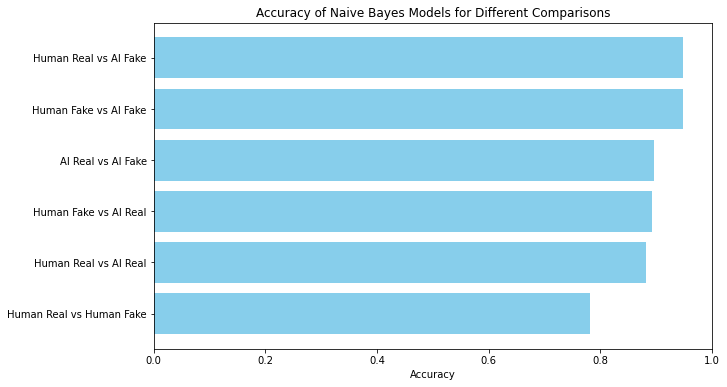

In [36]:
# Accuracy scores
accuracies = [
    accuracy_score(y_test_hr_vs_mf, naive_bayes_predictions_hr_vs_mf),
    accuracy_score(y_test_hf_vs_mf, naive_bayes_predictions_hf_vs_mf),
    accuracy_score(y_test_mr_vs_mf, naive_bayes_predictions_mr_vs_mf),
    accuracy_score(y_test_hf_vs_mr, naive_bayes_predictions_hf_vs_mr),
    accuracy_score(y_test_hr_vs_mr, naive_bayes_predictions_hr_vs_mr),
    accuracy_score(y_test_hr_vs_hf, naive_bayes_predictions_hr_vs_hf)
]

# Comparison labels
comparisons = [
    "Human Real vs AI Fake",
    "Human Fake vs AI Fake",
    "AI Real vs AI Fake",
    "Human Fake vs AI Real",
    "Human Real vs AI Real",
    "Human Real vs Human Fake"
]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(comparisons, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Naive Bayes Models for Different Comparisons')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy at the top
plt.show()

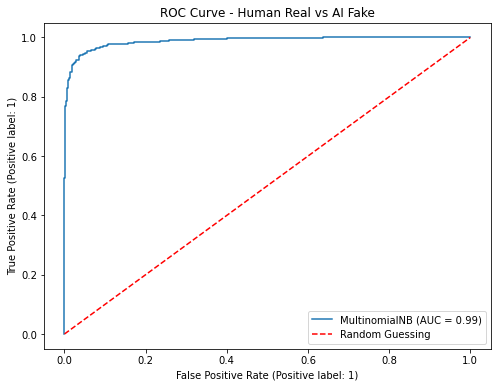

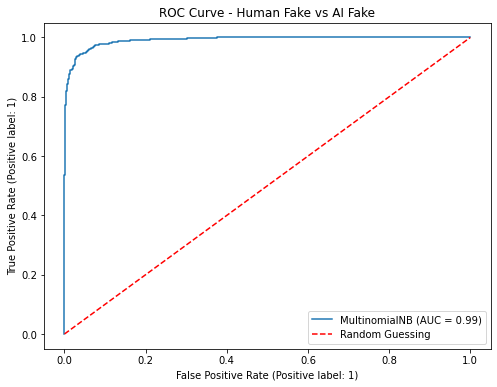

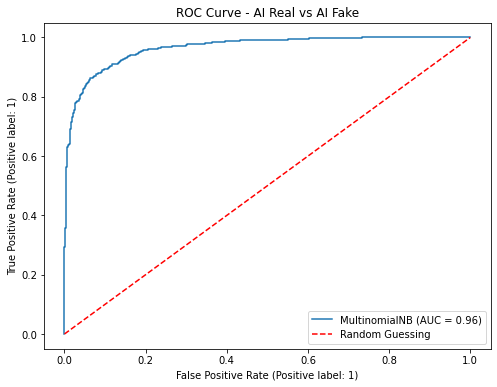

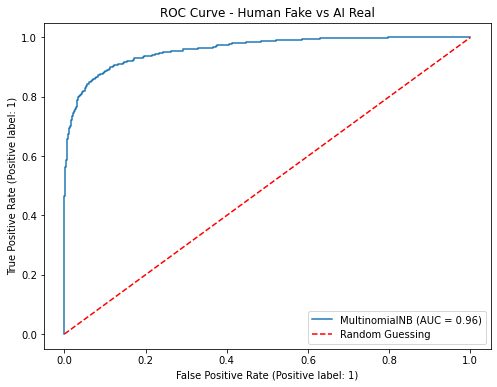

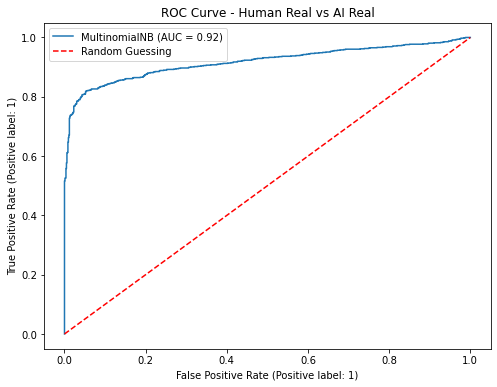

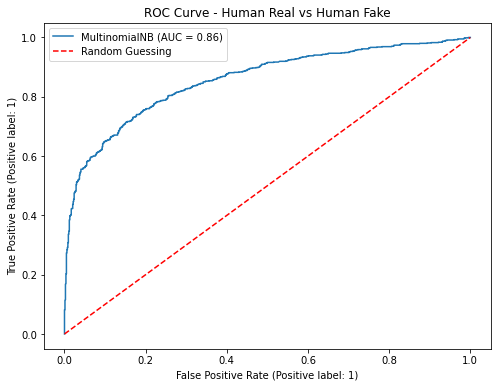

In [39]:
from sklearn.metrics import plot_roc_curve

# ROC Curve for Human Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(naive_bayes_model_hr_vs_mf, X_test_hr_vs_mf_tfidf, y_test_hr_vs_mf, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Real vs AI Fake')
plt.legend()
plt.show()

# ROC Curve for Human Fake vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(naive_bayes_model_hf_vs_mf, X_test_hf_vs_mf_tfidf, y_test_hf_vs_mf, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Fake vs AI Fake')
plt.legend()
plt.show()

# ROC Curve for AI Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(naive_bayes_model_mr_vs_mf, X_test_mr_vs_mf_tfidf, y_test_mr_vs_mf, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - AI Real vs AI Fake')
plt.legend()
plt.show()

# ROC Curve for Human Fake vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(naive_bayes_model_hf_vs_mr, X_test_hf_vs_mr_tfidf, y_test_hf_vs_mr, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Fake vs AI Real')
plt.legend()
plt.show()

# ROC Curve for Human Real vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(naive_bayes_model_hr_vs_mr, X_test_hr_vs_mr_tfidf, y_test_hr_vs_mr, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Real vs AI Real')
plt.legend()
plt.show()

# ROC Curve for Human Real vs Human Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(naive_bayes_model_hr_vs_hf, X_test_hr_vs_hf_tfidf, y_test_hr_vs_hf, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Real vs Human Fake')
plt.legend()
plt.show()

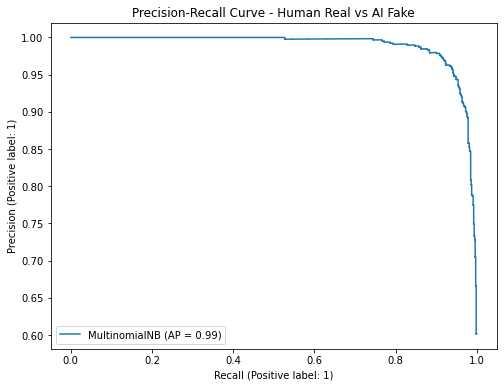

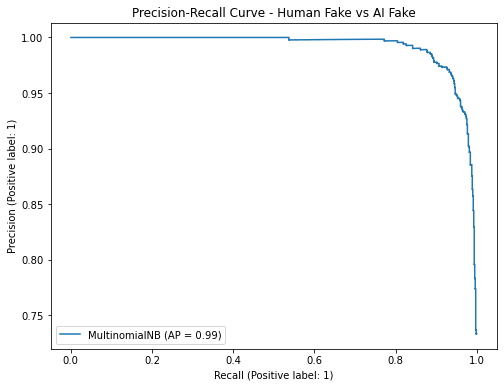

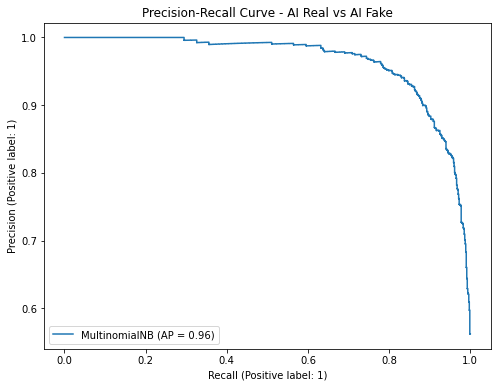

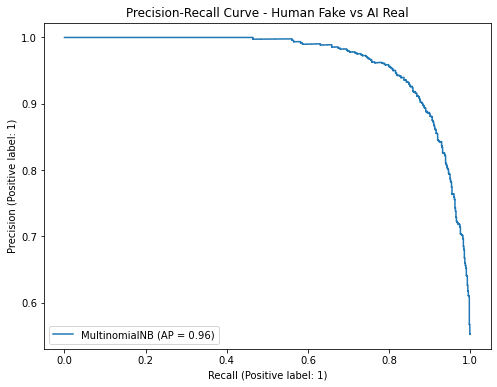

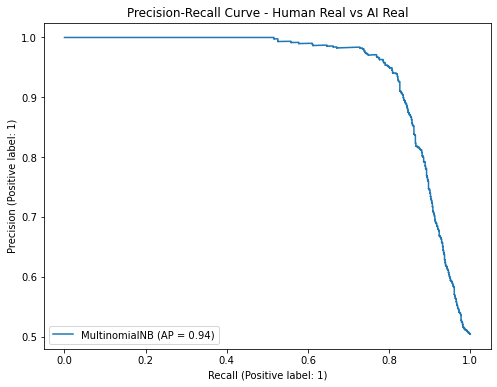

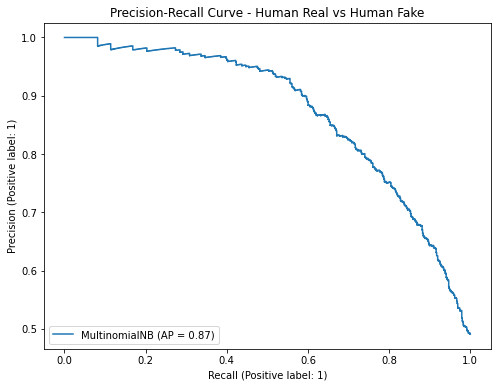

In [40]:
from sklearn.metrics import plot_precision_recall_curve

# Precision-Recall Curve for Human Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(naive_bayes_model_hr_vs_mf, X_test_hr_vs_mf_tfidf, y_test_hr_vs_mf, ax=ax)
ax.set_title('Precision-Recall Curve - Human Real vs AI Fake')
plt.show()

# Precision-Recall Curve for Human Fake vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(naive_bayes_model_hf_vs_mf, X_test_hf_vs_mf_tfidf, y_test_hf_vs_mf, ax=ax)
ax.set_title('Precision-Recall Curve - Human Fake vs AI Fake')
plt.show()

# Precision-Recall Curve for AI Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(naive_bayes_model_mr_vs_mf, X_test_mr_vs_mf_tfidf, y_test_mr_vs_mf, ax=ax)
ax.set_title('Precision-Recall Curve - AI Real vs AI Fake')
plt.show()

# Precision-Recall Curve for Human Fake vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(naive_bayes_model_hf_vs_mr, X_test_hf_vs_mr_tfidf, y_test_hf_vs_mr, ax=ax)
ax.set_title('Precision-Recall Curve - Human Fake vs AI Real')
plt.show()

# Precision-Recall Curve for Human Real vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(naive_bayes_model_hr_vs_mr, X_test_hr_vs_mr_tfidf, y_test_hr_vs_mr, ax=ax)
ax.set_title('Precision-Recall Curve - Human Real vs AI Real')
plt.show()

# Precision-Recall Curve for Human Real vs Human Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(naive_bayes_model_hr_vs_hf, X_test_hr_vs_hf_tfidf, y_test_hr_vs_hf, ax=ax)
ax.set_title('Precision-Recall Curve - Human Real vs Human Fake')
plt.show()

### Support Vector Machine (SVM)

#### Classification Objective: 
The primary objective of SVM is to find the optimal hyperplane that best separates the data points into different classes. In a binary classification scenario, this hyperplane is a decision boundary that maximizes the margin between the classes.

#### Margin Maximization: 
SVM aims to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class, known as support vectors. Maximizing this margin helps improve the generalization ability of the model, as it reduces the chances of misclassification on unseen data.

#### Regularization: 
SVM includes a regularization parameter (often denoted as C) that controls the trade-off between maximizing the margin and minimizing the classification error. A smaller value of C encourages a larger margin, potentially leading to a simpler model with higher bias and lower variance, while a larger value of C allows more flexibility in fitting the training data, potentially leading to a more complex model with lower bias and higher variance.

#### Robust to Overfitting: 
SVMs aim to maximize the margin between classes, which helps in generalizing well to unseen data. This margin maximization reduces the risk of overfitting, making SVMs robust in handling noisy data and complex decision boundaries.

#### Works well with Sparse Data: 
Text data often results in sparse feature vectors, where most dimensions are zero (indicating absence of a term). SVMs can handle sparse data efficiently, making them suitable for text classification tasks where the feature space can be large and sparse.

### Things to know about SVM models:

#### Kernel Selection: 
The choice of kernel function (e.g., linear, polynomial, radial basis function) can significantly impact the SVM's performance. The appropriate kernel should be selected based on the dataset characteristics and the problem at hand.

#### Hyperparameter Tuning: 
SVMs have hyperparameters such as the regularization parameter (C) and kernel parameters (e.g., gamma for RBF kernel) that need to be tuned for optimal performance. Cross-validation techniques are often used to find the best combination of hyperparameters.

#### Scalability: 
SVMs can be less scalable compared to some other algorithms, especially when dealing with large datasets. However, efficient implementations and optimization techniques are available to handle scalability issues to some extent.

In [41]:
from sklearn.svm import SVC

In [42]:
# SVM models for each comparison
svm_model_hr_vs_mf = SVC(kernel='linear')
svm_model_hr_vs_mf.fit(X_train_hr_vs_mf_tfidf, y_train_hr_vs_mf)

svm_model_hf_vs_mf = SVC(kernel='linear')
svm_model_hf_vs_mf.fit(X_train_hf_vs_mf_tfidf, y_train_hf_vs_mf)

svm_model_mr_vs_mf = SVC(kernel='linear')
svm_model_mr_vs_mf.fit(X_train_mr_vs_mf_tfidf, y_train_mr_vs_mf)

svm_model_hf_vs_mr = SVC(kernel='linear')
svm_model_hf_vs_mr.fit(X_train_hf_vs_mr_tfidf, y_train_hf_vs_mr)

svm_model_hr_vs_mr = SVC(kernel='linear')
svm_model_hr_vs_mr.fit(X_train_hr_vs_mr_tfidf, y_train_hr_vs_mr)

svm_model_hr_vs_hf = SVC(kernel='linear')
svm_model_hr_vs_hf.fit(X_train_hr_vs_hf_tfidf, y_train_hr_vs_hf)

# Predictions for each comparison
svm_predictions_hr_vs_mf = svm_model_hr_vs_mf.predict(X_test_hr_vs_mf_tfidf)
svm_predictions_hf_vs_mf = svm_model_hf_vs_mf.predict(X_test_hf_vs_mf_tfidf)
svm_predictions_mr_vs_mf = svm_model_mr_vs_mf.predict(X_test_mr_vs_mf_tfidf)
svm_predictions_hf_vs_mr = svm_model_hf_vs_mr.predict(X_test_hf_vs_mr_tfidf)
svm_predictions_hr_vs_mr = svm_model_hr_vs_mr.predict(X_test_hr_vs_mr_tfidf)
svm_predictions_hr_vs_hf = svm_model_hr_vs_hf.predict(X_test_hr_vs_hf_tfidf)

# Evaluate SVM models for each comparison
print("SVM Accuracy for Human Real vs AI Fake:", accuracy_score(y_test_hr_vs_mf, svm_predictions_hr_vs_mf))
print("SVM Accuracy for Human Fake vs AI Fake:", accuracy_score(y_test_hf_vs_mf, svm_predictions_hf_vs_mf))
print("SVM Accuracy for AI Real vs AI Fake:", accuracy_score(y_test_mr_vs_mf, svm_predictions_mr_vs_mf))
print("SVM Accuracy for Human Fake vs AI Real:", accuracy_score(y_test_hf_vs_mr, svm_predictions_hf_vs_mr))
print("SVM Accuracy for Human Real vs AI Real:", accuracy_score(y_test_hr_vs_mr, svm_predictions_hr_vs_mr))
print("SVM Accuracy for Human Real vs Human Fake:", accuracy_score(y_test_hr_vs_hf, svm_predictions_hr_vs_hf))

SVM Accuracy for Human Real vs AI Fake: 0.9769417475728155
SVM Accuracy for Human Fake vs AI Fake: 0.9657282741738066
SVM Accuracy for AI Real vs AI Fake: 0.9636583888552392
SVM Accuracy for Human Fake vs AI Real: 0.9267110841913991
SVM Accuracy for Human Real vs AI Real: 0.8948948948948949
SVM Accuracy for Human Real vs Human Fake: 0.7949029126213593


### Features for Fine Tuning

#### Textual Features:
##### N-grams: 
Extract word sequences of different lengths to capture patterns and context.
##### Word Embeddings: 
Use pre-trained word embeddings (e.g., Word2Vec, GloVe) to represent words in a continuous vector space.
##### Syntax: 
Analyze sentence structure, part-of-speech tags, and grammatical patterns.
##### Semantic Similarity: 
Measure how similar the article is to known AI-generated or human-generated articles using techniques like cosine similarity.
##### Sentiment Analysis: 
Determine the overall sentiment of the article and compare it to typical sentiment in AI-generated and human-generated articles.
##### Writing Style: 
Assess readability, complexity, and coherence using metrics like Flesch-Kincaid Grade Level or Gunning Fog Index.